In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import pickle

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BTC-USD Dataset

In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
# Preview Data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


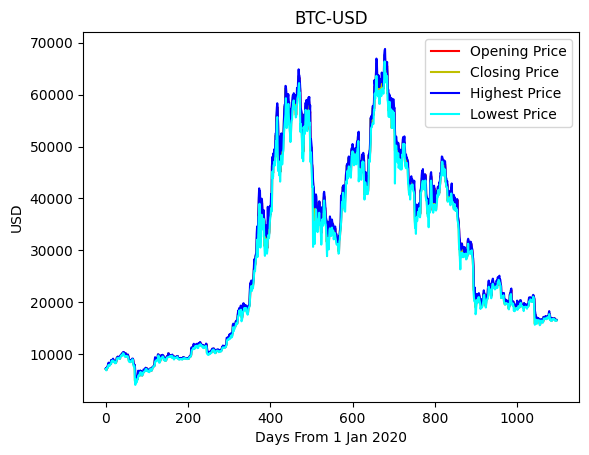

In [ ]:
# Visualizing Dataset

_, ax = plt.subplots()
ax.set_title('BTC-USD')
ax.plot(df['Open'], c='r')
ax.plot(df['Close'], c='y')
ax.plot(df['High'], c='b')
ax.plot(df['Low'], c='cyan')

ax.set_xlabel('Days From 1 Jan 2020')
ax.set_ylabel('USD')

ax.legend(['Opening Price', 'Closing Price', 'Highest Price', 'Lowest Price'])

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
train_label = df['Open'][1:].to_numpy()
test_set = df_test[['High', 'Low', 'Close']][:-1].to_numpy()
test_set_full = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_label = df_test['Open'][1:].to_numpy()
print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Train Labels: {train_label.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Shape of Test Labels: {test_label.shape}')

Shape of Train Set: (1096, 4)
Shape of Train Labels: (1096,)
Shape of Test Set: (151, 3)
Shape of Test Labels: (151,)


### Initial Models

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,), name='InputLayer'),
    tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='LinearUnit')
], name='RegressionModel')

In [ ]:
model.summary()

Model: "RegressionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LinearUnit (Dense)          (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(train_set, train_label, epochs=15, batch_size=32)

Epoch 1/15
35/35 [==============================] - 0s 1ms/step - loss: 606094912.0000
Epoch 2/15
35/35 [==============================] - 0s 969us/step - loss: 408129312.0000
Epoch 3/15
35/35 [==============================] - 0s 951us/step - loss: 264135680.0000
Epoch 4/15
35/35 [==============================] - 0s 1ms/step - loss: 163304032.0000
Epoch 5/15
35/35 [==============================] - 0s 979us/step - loss: 96228152.0000
Epoch 6/15
35/35 [==============================] - 0s 1ms/step - loss: 54091500.0000
Epoch 7/15
35/35 [==============================] - 0s 1ms/step - loss: 28817762.0000
Epoch 8/15
35/35 [==============================] - 0s 1ms/step - loss: 14750624.0000
Epoch 9/15
35/35 [==============================] - 0s 996us/step - loss: 7260159.5000
Epoch 10/15
35/35 [==============================] - 0s 1ms/step - loss: 3483208.7500
Epoch 11/15
35/35 [==============================] - 0s 973us/step - loss: 1717628.1250
Epoch 12/15
35/35 [======================

RMSE: 647.1987


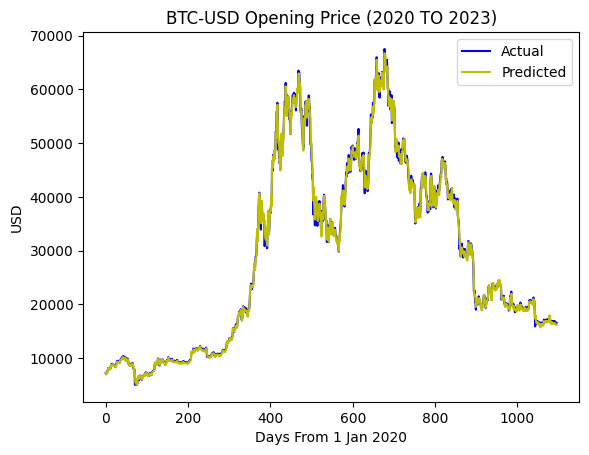

In [ ]:
# Check Prediction on Train Set
pred = model.predict(train_set, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - train_label)) / train_label.shape[0]), 4)}')

RMSE: 384.5778


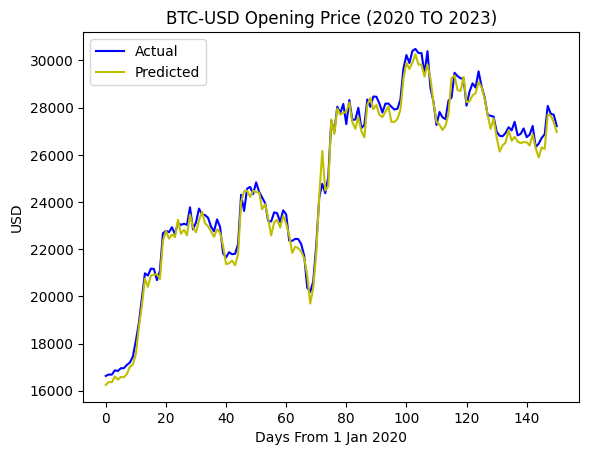

In [ ]:
# Check Prediction on Test Set Short Term
pred = model.predict(test_set_full, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

RMSE: 62428.4067


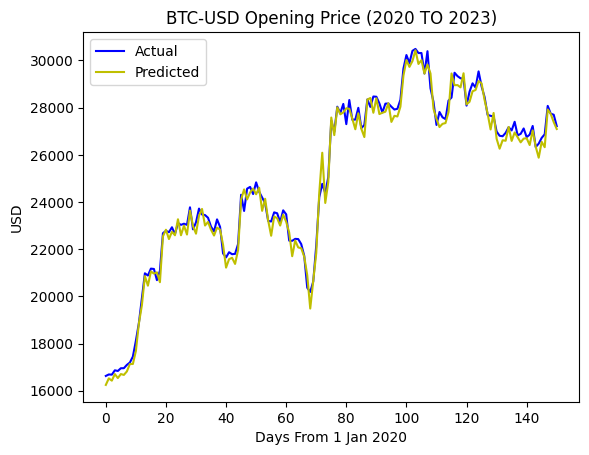

In [ ]:
# Check Prediction on Test Set Long Term
open_price = df_test['Open'][0]
pred = []
for i in range(test_label.shape[0]):
    pred.append(model.predict(np.array([open_price, *test_set[i].tolist()]).reshape(1, 4), verbose=False).ravel())
    open_price = pred[-1][0]

ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

In [ ]:
conv_layer = tf.keras.layers.Conv2D(7, 1, padding='same',name='ConvLayer')
dense_layer = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='DenseLayer')
def get_cnn_model():
    inputs = tf.keras.Input(shape=(2,2,1), name='InputLayer')
    o = conv_layer(inputs)
    o = tf.keras.layers.Flatten(name='FlattenLayer')(o)
    outputs = dense_layer(o)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name='CNNModel')

In [ ]:
cnn = get_cnn_model()
cnn.summary()

Model: "CNNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 2, 2, 1)]         0         
                                                                 
 ConvLayer (Conv2D)          (None, 2, 2, 7)           14        
                                                                 
 FlattenLayer (Flatten)      (None, 28)                0         
                                                                 
 DenseLayer (Dense)          (None, 1)                 29        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
cnn.fit(train_set.reshape((train_set.shape[0], 2, 2, 1)), train_label, epochs=15, batch_size=32)

Epoch 1/15
35/35 [==============================] - 0s 1ms/step - loss: 58403684.0000
Epoch 2/15
35/35 [==============================] - 0s 1ms/step - loss: 1536480.8750
Epoch 3/15
35/35 [==============================] - 0s 1ms/step - loss: 891856.5000
Epoch 4/15
35/35 [==============================] - 0s 1ms/step - loss: 873146.0625
Epoch 5/15
35/35 [==============================] - 0s 1ms/step - loss: 871722.1875
Epoch 6/15
35/35 [==============================] - 0s 1ms/step - loss: 866826.3750
Epoch 7/15
35/35 [==============================] - 0s 1ms/step - loss: 867517.9375
Epoch 8/15
35/35 [==============================] - 0s 973us/step - loss: 858452.8750
Epoch 9/15
35/35 [==============================] - 0s 1ms/step - loss: 850321.8750
Epoch 10/15
35/35 [==============================] - 0s 1ms/step - loss: 853878.4375
Epoch 11/15
35/35 [==============================] - 0s 1ms/step - loss: 843864.7500
Epoch 12/15
35/35 [==============================] - 0s 1ms/step - lo

RMSE: 904.9393


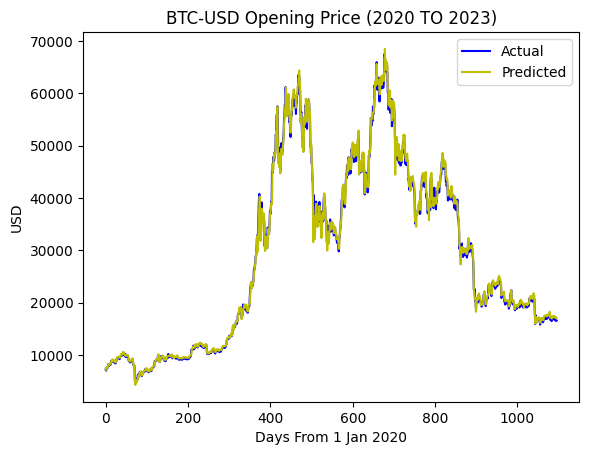

In [ ]:
# Check Prediction on Train Set
pred = cnn.predict(train_set.reshape((train_set.shape[0], 2, 2, 1)), verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - train_label)) / train_label.shape[0]), 4)}')

RMSE: 594.099


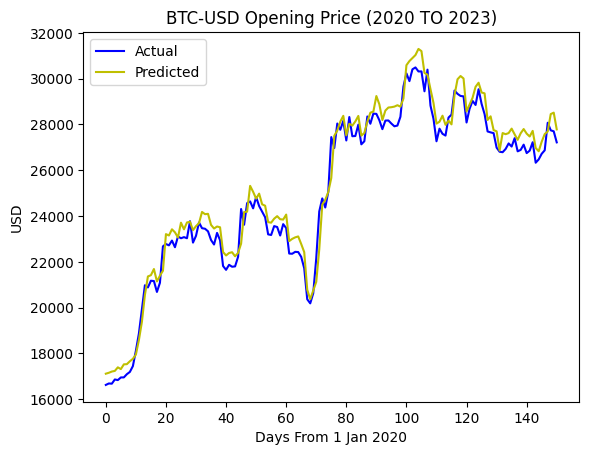

In [ ]:
# Check Prediction on Test Set Short Term
pred = cnn.predict(test_set_full.reshape((test_set_full.shape[0], 2, 2, 1)), verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / test_label.shape[0]), 4)}')

RMSE: 59452.075


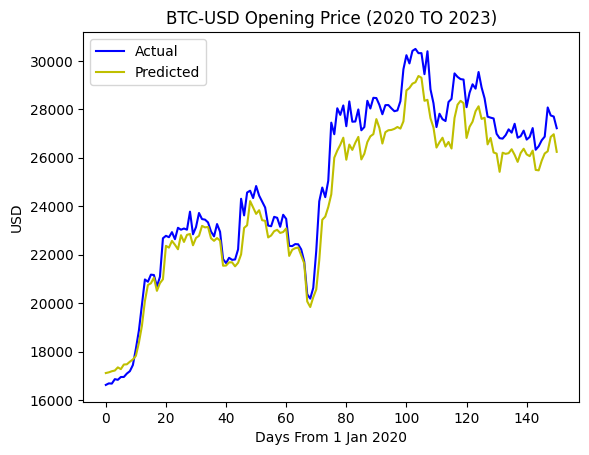

In [ ]:
# Check Prediction on Test Set Long Term
open_price = df_test['Open'][0]
pred = []
for i in range(test_label.shape[0]):
    if i % 100 == 0:
        print(f'[+] Completed {i}', end='\r')
    pred.append(cnn.predict(np.array([open_price, *test_set[i].tolist()]).reshape(1, 2, 2, 1), verbose=False).ravel())
pred = np.array(pred)
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label)) / pred.shape[0]), 4)}')

In [ ]:
lstm_layer = tf.keras.layers.LSTM(units=64, name='LSTMLayer', return_state=True)
dense_layer = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='DenseLayer')
def get_lstm_model(n_steps):
    inputs = tf.keras.Input(shape=(n_steps, 4), name='InputLayer')
    a0 = tf.keras.Input(shape=(64,), name='Activations')
    c0 = tf.keras.Input(shape=(64,), name='HiddenStates')

    a = a0
    c = c0

    for i in range(n_steps):
        x = inputs[:, i, :]
        x = tf.keras.layers.Reshape((1, 4))(x)
        a, _, c = lstm_layer(x, initial_state=[a, c])
    outputs = dense_layer(a)
    return tf.keras.Model(inputs=[inputs, a0, c0], outputs=outputs, name='LSTMModel')

In [ ]:
#Run this second
#Training for a 3 step prediction model
n_steps = 1
# Gloabal Layers
layer_o1_x = tf.keras.layers.Dense(units=24, activation='leaky_relu', kernel_initializer='he_normal')
layer_o1_y = tf.keras.layers.Dense(units=4, activation='leaky_relu', kernel_initializer='he_normal')
layer_o1 = tf.keras.layers.Concatenate(axis=-1)
layer_o2 = tf.keras.layers.Dense(units=6, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')
layer_a = tf.keras.layers.Dense(units=1, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')
layer_ug = tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')
layer_fg = tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')

def get_lstm_model(n_steps=n_steps):
  X = tf.keras.Input((n_steps,4))
  Y = tf.keras.Input((1,1))

  y = Y

  outputs = []
  for i in range(n_steps):
    # y = layer_y(y)
    x = X[:, i, :]
    x = tf.keras.layers.Reshape((1, 4))(x)

    o1_x = layer_o1_x(x)

    # o1_y = tf.math.multiply(y, weighter)
    # o1_y = tf.keras.layers.Dense(units=1, activation='linear', kernel_initializer='he_normal')(y)
    o1_y = layer_o1_y(y)

    # o2_y = tf.keras.layers.Dense(units=1024, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')(y)
    # o3_y = tf.keras.layers.Dense(units=1024, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal')(x)

    o1 = layer_o1([o1_x, o1_y])
    o2 = layer_o2(o1)
    a = layer_a(o1)

    ug = layer_ug(o2)
    fg = layer_fg(o2)

    ug_term = tf.math.multiply(a, ug)
    fg_term = tf.math.multiply(y, fg)

    y = tf.keras.layers.add([ug_term, fg_term])
    outputs.append(y)

  model = tf.keras.Model(inputs=[X, Y], outputs=outputs, name='LSTM')
  return model

In [ ]:
lstm = get_lstm_model(1)

In [ ]:
lstm.summary()

Model: "LSTM"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 4)]       0           []                               
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 4)           0           ['input_1[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 reshape (Reshape)              (None, 1, 4)         0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                                
                                                                                               

In [ ]:
lstm.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
lstm.fit([train_set[1:, :].reshape((train_set.shape[0] - 1, 1, 4)), train_label[:-1].reshape((train_label.shape[0] - 1, 1, 1))], train_label[1:], epochs=15, batch_size=32)

Epoch 1/15
35/35 [==============================] - 1s 2ms/step - loss: 569160896.0000
Epoch 2/15
35/35 [==============================] - 0s 1ms/step - loss: 564033920.0000
Epoch 3/15
35/35 [==============================] - 0s 1ms/step - loss: 570717056.0000
Epoch 4/15
35/35 [==============================] - 0s 1ms/step - loss: 575145024.0000
Epoch 5/15
35/35 [==============================] - 0s 1ms/step - loss: 570350272.0000
Epoch 6/15
35/35 [==============================] - 0s 2ms/step - loss: 576748736.0000
Epoch 7/15
35/35 [==============================] - 0s 2ms/step - loss: 571587584.0000
Epoch 8/15
35/35 [==============================] - 0s 1ms/step - loss: 563467648.0000
Epoch 9/15
35/35 [==============================] - 0s 2ms/step - loss: 569594368.0000
Epoch 10/15
35/35 [==============================] - 0s 2ms/step - loss: 569133440.0000
Epoch 11/15
35/35 [==============================] - 0s 2ms/step - loss: 567148992.0000
Epoch 12/15
35/35 [======================

RMSE: 1274.9674


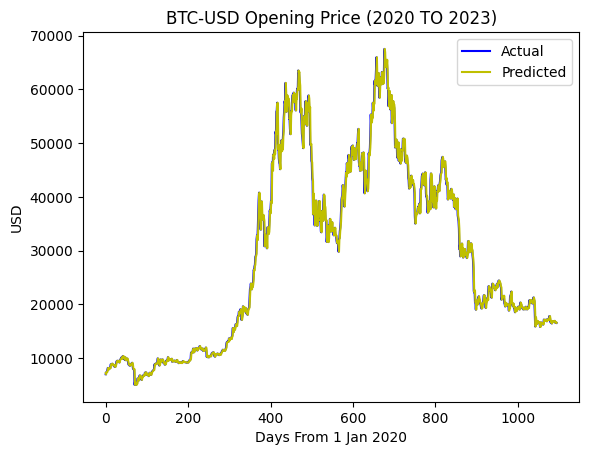

In [ ]:
# Check Prediction on Train Set
pred = lstm.predict([train_set[1:, :].reshape((train_set.shape[0] - 1, 1, 4)), train_label[:-1].reshape((train_label.shape[0] - 1, 1, 1))], verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label[1:], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - train_label[1:])) / pred.shape[0]), 4)}')

RMSE: 630.6161


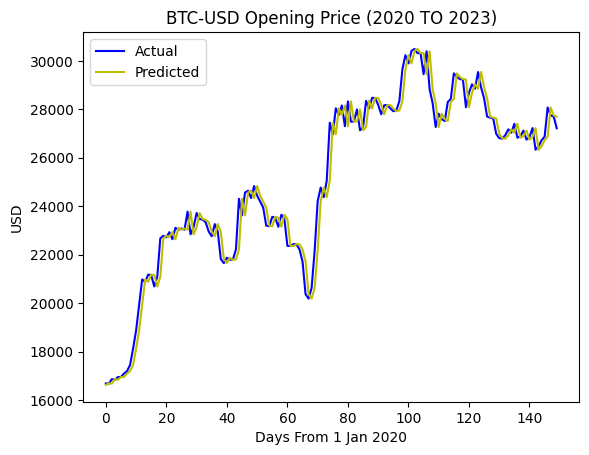

In [ ]:
# Check Prediction on Test Set
pred = lstm.predict([test_set_full[1:, :].reshape((test_set.shape[0] - 1, 1, 4)), test_label[:-1].reshape((test_label.shape[0] - 1, 1, 1))], verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label[1:], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label[1:])) / pred.shape[0]), 4)}')

RMSE: 9152.2628


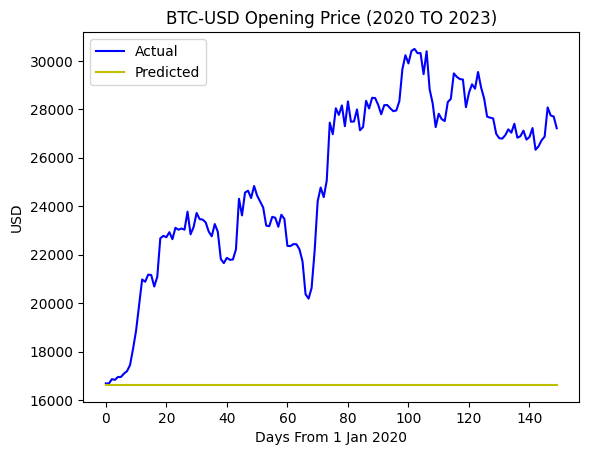

In [ ]:
# Check Prediction on Test Set Forecast
ini = test_label[0]
pred = []
for i in range(1, test_set.shape[0]):
    ini = lstm.predict([np.array([ini, *test_set[i].tolist()]).reshape(1, 1, 4), ini.reshape(1, 1, 1)], verbose=False).ravel()[0]
    pred.append(ini)
pred = np.array(pred)
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label[1:], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - test_label[1:])) / pred.shape[0]), 4)}')

## DNN After Modification

In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
train_label = df['Open'][1:].to_numpy()
test_set = df_test[['High', 'Low', 'Close']][:-1].to_numpy()
test_set_full = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_label = df_test['Open'][1:].to_numpy()

scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
train_label_scaled = scaler.transform(np.repeat(train_label, 4).reshape(-1, 4))[:, 0]
test_set_full_scaled = scaler.transform(test_set_full)
test_label_scaled = scaler.transform(np.repeat(test_label, 4).reshape(-1, 4))[:, 0]
test_set_scaled = test_set_full[:, :-1]

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Train Labels: {train_label.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Shape of Test Labels: {test_label.shape}')

Shape of Train Set: (1096, 4)
Shape of Train Labels: (1096,)
Shape of Test Set: (151, 3)
Shape of Test Labels: (151,)


In [ ]:
window_size = 30

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(30, 4), name='InputLayer'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=124, activation='leaky_relu', kernel_initializer='he_normal', name='FeatureEngineering'),
    tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='LinearUnit')
], name='RegressionModel')

In [ ]:
train_reg = []
train_label_reg = []
train_label_reg_actual = []
for i in range(train_set.shape[0] - window_size):
    train_reg.append(train_set_scaled[i:i+window_size])
    train_label_reg.append(train_label_scaled[i+window_size])
    train_label_reg_actual.append(train_label[i+window_size])
train_reg = np.array(train_reg)
train_label_reg = np.array(train_label_reg)
train_label_reg_actual = np.array(train_label_reg_actual)

test_reg = []
test_reg_multi = []
test_label_reg = []
test_label_reg_actual = []
test_reg_multi_actual = []
for i in range(test_set_full.shape[0] - window_size):
    test_reg.append(test_set_full_scaled[i:i+window_size])
    test_reg_multi.append(test_set_scaled[i:i+window_size])
    test_label_reg.append(test_label_scaled[i+window_size])
    test_reg_multi_actual.append(test_set[i:i+window_size])
    test_label_reg_actual.append(test_label[i+window_size])
test_reg = np.array(test_reg)
test_label_reg = np.array(test_label_reg)
test_reg_multi = np.array(test_reg_multi)
test_reg_multi_actual = np.array(test_reg_multi_actual)
test_label_reg_actual = np.array(test_label_reg_actual)


print(f'Train Set Shape: {train_reg.shape}')
print(f'Train Label Shape: {train_label_reg.shape}')
print(f'Test Set Shape: {test_reg.shape}')
print(f'Test Label Shape: {test_label_reg.shape}')

Train Set Shape: (1066, 30, 4)
Train Label Shape: (1066,)
Test Set Shape: (121, 30, 4)
Test Label Shape: (121,)


In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(train_reg, train_label_reg, epochs=15, batch_size=32)

Epoch 1/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0796
Epoch 2/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 3/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 4/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 5/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 6/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 7/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 8/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 9/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 10/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 11/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 12/15
34/34 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 13/15
34/34 [==============================

RMSE: 1617.0487


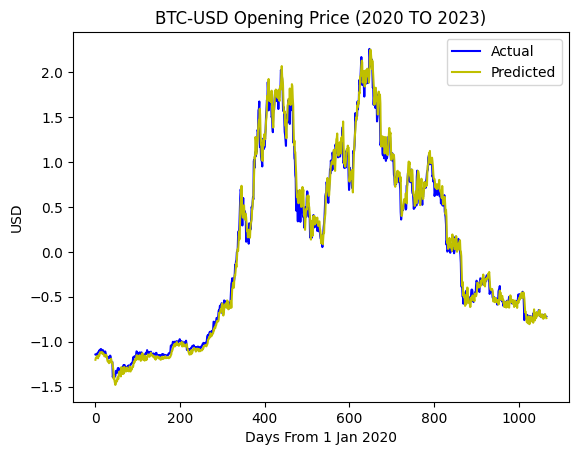

In [ ]:
# Check Prediction on Train Set
pred = model.predict(train_reg, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label_reg, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - train_label_reg_actual)) / pred.shape[0]), 4)}')

RMSE: 1220.3824


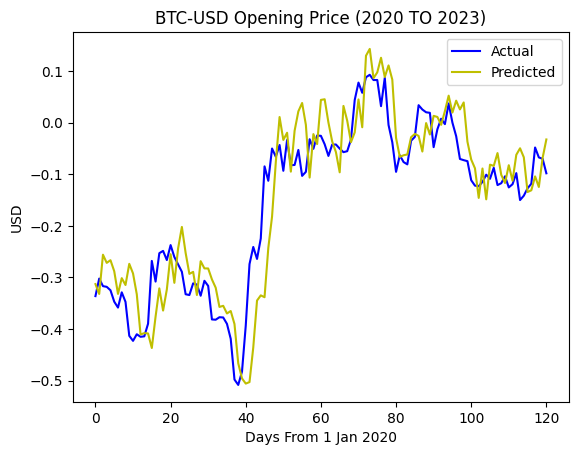

In [ ]:
# Check Prediction on Test Set Short Term
pred = model.predict(test_reg, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label_reg, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - test_label_reg_actual)) / pred.shape[0]), 4)}')

RMSE: 1588.6375


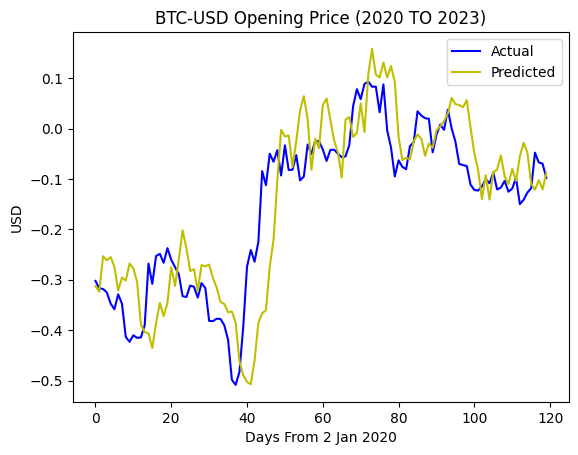

In [ ]:
# Check Prediction on Test Set Long Term
open_price = df_test['Open'][0]
ini = test_reg[0]
pred = []
for i in range(1, test_reg.shape[0]):
    open_price = model.predict(ini.reshape(1, window_size, 4), verbose=False).ravel()[0]
    ini = test_reg[i]
    ini[-1, 0] = open_price
    pred.append(open_price)
pred = np.array(pred)
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 2 Jan 2020')
ax.plot(test_label_reg[1:], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - test_label_reg_actual[1:])) / pred.shape[0]), 4)}')

## CNN After Modification

In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
train_label = df['Open'][1:].to_numpy()
test_set = df_test[['High', 'Low', 'Close']][:-1].to_numpy()
test_set_full = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_label = df_test['Open'][1:].to_numpy()

scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
train_label_scaled = scaler.transform(np.repeat(train_label, 4).reshape(-1, 4))[:, 0]
test_set_full_scaled = scaler.transform(test_set_full)
test_label_scaled = scaler.transform(np.repeat(test_label, 4).reshape(-1, 4))[:, 0]
test_set_scaled = test_set_full[:, :-1]

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Train Labels: {train_label.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Shape of Test Labels: {test_label.shape}')

Shape of Train Set: (1096, 4)
Shape of Train Labels: (1096,)
Shape of Test Set: (151, 3)
Shape of Test Labels: (151,)


In [ ]:
train_reg = []
train_label_reg = []
train_label_reg_actual = []
for i in range(train_set.shape[0] - window_size):
    train_reg.append(train_set_scaled[i:i+window_size])
    train_label_reg.append(train_label_scaled[i+window_size])
    train_label_reg_actual.append(train_label[i+window_size])
train_reg = np.array(train_reg)
train_label_reg = np.array(train_label_reg)
train_label_reg_actual = np.array(train_label_reg_actual)

test_reg = []
test_reg_multi = []
test_label_reg = []
test_label_reg_actual = []
test_reg_multi_actual = []
for i in range(test_set_full.shape[0] - window_size):
    test_reg.append(test_set_full_scaled[i:i+window_size])
    test_reg_multi.append(test_set_scaled[i:i+window_size])
    test_label_reg.append(test_label_scaled[i+window_size])
    test_reg_multi_actual.append(test_set[i:i+window_size])
    test_label_reg_actual.append(test_label[i+window_size])
test_reg = np.array(test_reg)
test_label_reg = np.array(test_label_reg)
test_reg_multi = np.array(test_reg_multi)
test_reg_multi_actual = np.array(test_reg_multi_actual)
test_label_reg_actual = np.array(test_label_reg_actual)


print(f'Train Set Shape: {train_reg.shape}')
print(f'Train Label Shape: {train_label_reg.shape}')
print(f'Test Set Shape: {test_reg.shape}')
print(f'Test Label Shape: {test_label_reg.shape}')

Train Set Shape: (1066, 30, 4)
Train Label Shape: (1066,)
Test Set Shape: (121, 30, 4)
Test Label Shape: (121,)


In [ ]:
train_cnn = train_reg.reshape((train_reg.shape[0], 2, 2, window_size))
train_label_cnn = train_label_reg
train_label_cnn_actual = train_label_reg_actual

test_cnn = test_reg.reshape((test_reg.shape[0], 2, 2, window_size))
test_label_cnn = test_label_reg
test_label_cnn_actual = test_label_reg_actual

In [ ]:
conv_layer = tf.keras.layers.Conv2D(62, 1, padding='same',name='ConvLayer')
zero_pad = tf.keras.layers.ZeroPadding2D((1, 1), name='ZeroPad')
conv_layer2 = tf.keras.layers.Conv2D(30, 2, padding='valid',name='ConvLayer2')
dense_layer = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='DenseLayer')
def get_cnn_model():
    inputs = tf.keras.Input(shape=(2,2,window_size), name='InputLayer')
    o = conv_layer(inputs)
    o = zero_pad(o)
    o = conv_layer2(o)
    o = tf.keras.layers.Flatten(name='FlattenLayer')(o)
    outputs = dense_layer(o)

    return tf.keras.Model(inputs=inputs, outputs=outputs, name='CNNModel')

In [ ]:
mod_cnn = get_cnn_model()

In [ ]:
mod_cnn.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
mod_cnn.fit(train_cnn, train_label_cnn, epochs=15, batch_size=32)

Epoch 1/15
34/34 [==============================] - 1s 2ms/step - loss: 0.0768
Epoch 2/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 4/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 5/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 6/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 7/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 8/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 9/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 10/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 11/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 12/15
34/34 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 13/15
34/34 [==============================

RMSE: 2594.149


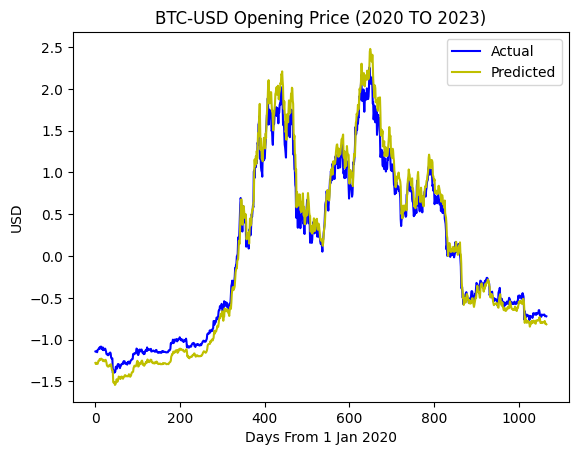

In [ ]:
# Check Prediction on Train Set
pred = mod_cnn.predict(train_cnn, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(train_label_cnn, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - train_label_cnn_actual)) / pred.shape[0]), 4)}')

RMSE: 936.5195


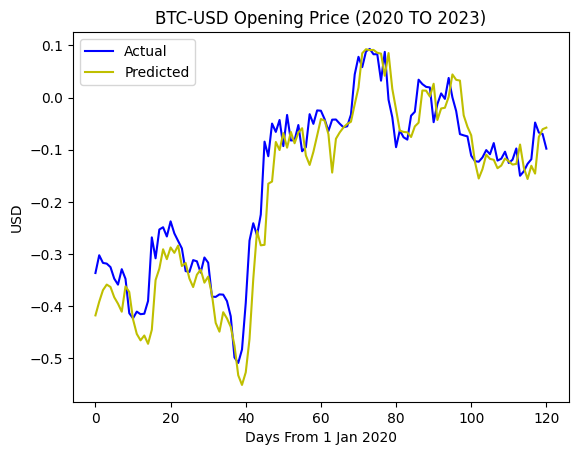

In [ ]:
# Check Prediction on Test Set
pred = mod_cnn.predict(test_cnn, verbose=False).ravel()
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(test_label_cnn, c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - test_label_cnn_actual)) / pred.shape[0]), 4)}')

RMSE: 1195.9098


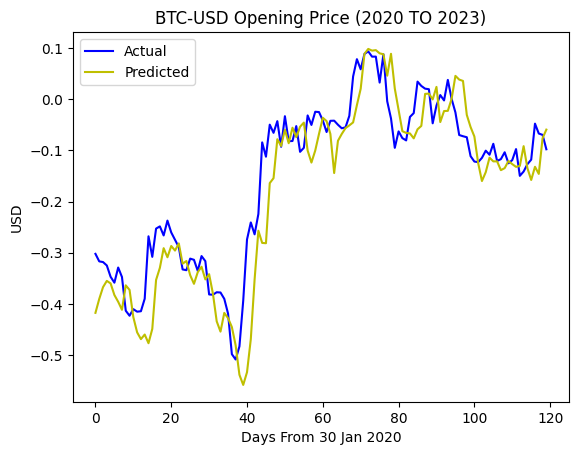

In [ ]:
# Check Prediction on Test Set
ini = test_cnn[0]
pred = []
for i in range(1, test_cnn.shape[0]):
    open_price = mod_cnn.predict(ini.reshape((1, *test_cnn.shape[1:])), verbose=False).ravel()[0]
    ini = test_cnn[i]
    ini[-1,0,0] = open_price
    pred.append(open_price)
pred = np.array(pred)
ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 30 Jan 2020')
ax.plot(test_label_cnn[1:], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

actual_pred = scaler.inverse_transform(np.repeat(pred, 4).reshape(-1, 4))[:, 0]
print(f'RMSE: {round(np.sqrt(np.sum(np.square(actual_pred - test_label_cnn_actual[1:])) / pred.shape[0]), 4)}')

## Modified LSTM

In [ ]:
train_lstm = []
train_label_lstm = []
for i in range(1, train_set_scaled.shape[0] - window_size):
    train_lstm.append(train_set_scaled[i:i+window_size])
    train_label_lstm.append(train_label_scaled[i+1:i+window_size+1])
train_lstm = np.array(train_lstm)
train_lstm = train_lstm[:, :, 1:]
train_label_lstm = np.array(train_label_lstm)

test_lstm = []
test_lstm_multi = []
test_label_lstm = []
for i in range(1, test_set_full_scaled.shape[0] - window_size):
    test_lstm.append(test_set_full_scaled[i:i+window_size])
    test_lstm_multi.append(test_set_scaled[i:i+window_size])
    test_label_lstm.append(test_label_scaled[i+1:i+window_size+1])
test_lstm = np.array(test_lstm)
test_lstm = test_lstm[:, :, 1:]
test_label_lstm = np.array(test_label_lstm)

ini = train_set_scaled[:-window_size-1, 0].reshape((train_lstm.shape[0], 1, 1))
ini_test = test_set_full_scaled[:-window_size-1, 0].reshape((test_lstm.shape[0], 1, 1))
print(f'Train Set Shape: {train_lstm.shape}')
print(f'Train Label Shape: {train_label_lstm.shape}')
print(f'Test Set Shape: {test_lstm.shape}')
print(f'Test Label Shape: {test_label_lstm.shape}')
print(f'Ini Shape: {ini.shape}')

Train Set Shape: (1065, 30, 3)
Train Label Shape: (1065, 30)
Test Set Shape: (120, 30, 3)
Test Label Shape: (120, 30)
Ini Shape: (1065, 1, 1)


In [ ]:
# Gloabal Layers
x_reshaper = tf.keras.layers.Reshape((1, 3))
y_reshaper = tf.keras.layers.Reshape((1, 1))

layer_a_reverse = tf.keras.layers.Dense(units=12, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=12, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=12, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=12, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=12, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=12, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=12, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=1, kernel_initializer='he_normal', name='l9')

def get_lstm_model(past=window_size):
    X = tf.keras.Input((past,3), name='InputX')
    ini = tf.keras.Input((1,1), name='InputPrevCost') # Prev Cost Value
    C = tf.keras.Input((1, 12), name='c_state')
    c = C
    a = layer_a_reverse(ini)
    outputs = []
    for i in range(past):
        x = X[:, i, :]
        x = x_reshaper(x)
        o1_x = layer_o1_x(x)

        o1 = layer_concat([o1_x, a])
        ug = layer_ug(o1)
        fg = layer_fg(o1)
        a_gate = layer_a_sigmoid(o1)

        c_tilda = layer_c_tilda(o1)

        ug_term = tf.math.multiply(c_tilda, ug)
        fg_term = tf.math.multiply(c, fg)

        c = tf.keras.layers.add([ug_term, fg_term])

        a = layer_a(c)

        a = tf.math.multiply(a, a_gate)

        out = layer_out(a)
        outputs.append(out)
    if past == 1:
        model = tf.keras.Model(inputs=[X, ini, C], outputs=[*outputs, c], name='LSTM')
    else:
        model = tf.keras.Model(inputs=[X, ini, C], outputs=outputs, name='LSTM')
    return model

In [ ]:
mod_lstm = get_lstm_model()

In [ ]:
mod_lstm.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))
mod_lstm.fit([train_lstm, ini, np.zeros((train_lstm.shape[0], 1, 12))], train_label_lstm, epochs=15, batch_size=32)

Epoch 1/15
34/34 [==============================] - 19s 9ms/step - loss: 2.5473 - l9_loss: 0.1100 - l9_1_loss: 0.0893 - l9_2_loss: 0.0788 - l9_3_loss: 0.0731 - l9_4_loss: 0.0686 - l9_5_loss: 0.0646 - l9_6_loss: 0.0609 - l9_7_loss: 0.0573 - l9_8_loss: 0.0541 - l9_9_loss: 0.0510 - l9_10_loss: 0.0482 - l9_11_loss: 0.0457 - l9_12_loss: 0.0434 - l9_13_loss: 0.0415 - l9_14_loss: 0.0399 - l9_15_loss: 0.0386 - l9_16_loss: 0.0377 - l9_17_loss: 0.0370 - l9_18_loss: 0.0367 - l9_19_loss: 0.0366 - l9_20_loss: 0.0369 - l9_21_loss: 0.0376 - l9_22_loss: 0.0386 - l9_23_loss: 0.0399 - l9_24_loss: 0.0413 - l9_25_loss: 0.0431 - l9_26_loss: 0.0451 - l9_27_loss: 0.0476 - l9_28_loss: 0.0505 - l9_29_loss: 0.0540
Epoch 2/15
34/34 [==============================] - 0s 11ms/step - loss: 2.4698 - l9_loss: 0.1056 - l9_1_loss: 0.0874 - l9_2_loss: 0.0781 - l9_3_loss: 0.0728 - l9_4_loss: 0.0686 - l9_5_loss: 0.0647 - l9_6_loss: 0.0610 - l9_7_loss: 0.0574 - l9_8_loss: 0.0540 - l9_9_loss: 0.0509 - l9_10_loss: 0.0480 - l

RMSE: 2578.6103


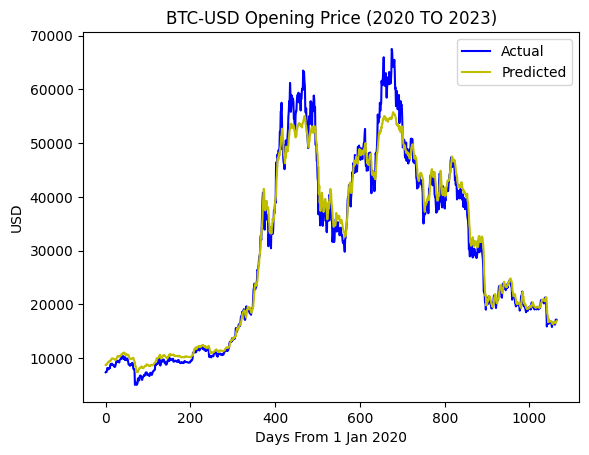

In [ ]:
# Check Prediction on Train Set
step = 0
pred = mod_lstm.predict([train_lstm, ini, np.zeros((train_lstm.shape[0], 1, 12))], verbose=False)
pred_orig = pred
pred = scaler.inverse_transform(np.repeat(pred[step].ravel(), 4).reshape((-1, 4)))[:, 0]

ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(scaler.inverse_transform(np.repeat(train_label_lstm[:, step], 4).reshape((-1, 4)))[:, 0], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - scaler.inverse_transform(np.repeat(train_label_lstm[:, step], 4).reshape((-1, 4)))[:, 0])) / pred.shape[0]), 4)}')

RMSE: 1189.07


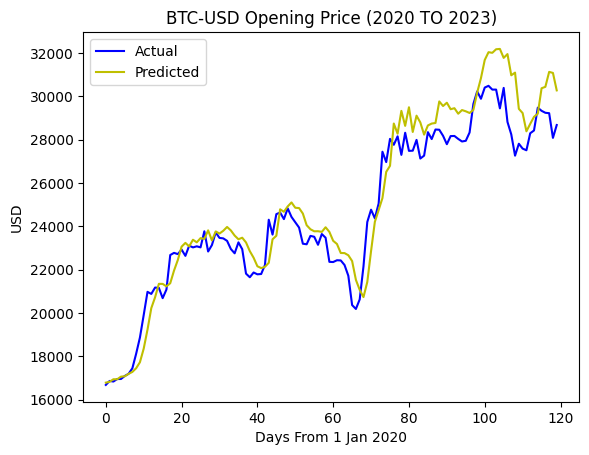

In [ ]:
# Check Prediction on Test Set
step = 0
pred = mod_lstm.predict([test_lstm, ini_test, np.zeros((test_lstm.shape[0], 1, 12))], verbose=False)
pred = scaler.inverse_transform(np.repeat(pred[step].ravel(), 4).reshape((-1, 4)))[:, 0]

ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 1 Jan 2020')
ax.plot(scaler.inverse_transform(np.repeat(test_label_lstm[:, step], 4).reshape((-1, 4)))[:, 0], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - scaler.inverse_transform(np.repeat(test_label_lstm[:, step], 4).reshape((-1, 4)))[:, 0])) / pred.shape[0]), 4)}')

RMSE: 994.0619


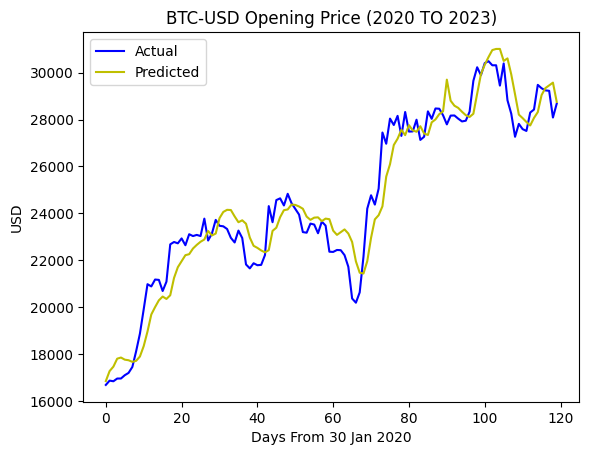

In [ ]:
# Check Prediction on Test Set
ini_multi = test_label_scaled[0].reshape((1, 1, 1))
pred = []
c = np.zeros((1, 1, 12))

ini_val = test_label_lstm[0, 0].reshape((1, 1, 1))
for i in range(0, test_lstm.shape[0], window_size):
    temp = mod_lstm.predict([test_lstm[i].reshape((1, window_size, 3)), ini_val, np.zeros((1, 1, 12))], verbose=False)
    temp = [x.ravel()[0] for x in temp]
    pred.extend(temp)
    ini_val = test_label_scaled[i+window_size].reshape((1,1,1))
pred = np.array(pred)
pred = scaler.inverse_transform(np.repeat(pred, 4).reshape((-1, 4)))[:, 0]

ax = plt.subplot()
ax.set_title('BTC-USD Opening Price (2020 TO 2023)')
ax.set_ylabel('USD')
ax.set_xlabel('Days From 30 Jan 2020')
ax.plot(scaler.inverse_transform(np.repeat(test_label_lstm[:, 0], 4).reshape((-1, 4)))[:, 0], c='b')
ax.plot(pred, c='y')
ax.legend(['Actual', 'Predicted'])

print(f'RMSE: {round(np.sqrt(np.sum(np.square(pred - scaler.inverse_transform(np.repeat(test_label_lstm[:, 0], 4).reshape((-1, 4)))[:, 0])) / pred.shape[0]), 4)}')

# BTC-USD Dataset Irregularly Sample Time Series

## Defining LSTM Model

In [ ]:
# Gloabal Layers
x_reshaper = tf.keras.layers.Reshape((1, 4))
y_reshaper = tf.keras.layers.Reshape((1, 4))
hidden_units = 64
window_size = 30

layer_a_reverse = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

x_reshaper_ = tf.keras.layers.Reshape((1, 4))
y_reshaper_ = tf.keras.layers.Reshape((1, 4))

layer_a_reverse_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat_ = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda_ = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out_ = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

def get_lstm_model(past=window_size):
    ini = tf.keras.Input((1,4), name='InputPrevCost')
    C = tf.keras.Input((1, hidden_units), name='c_state')
    c = C
    inp = ini
    a = layer_a_reverse(ini)
    outputs = []
    for i in range(past):
        x = x_reshaper(inp)
        o1_x = layer_o1_x(x)

        o1 = layer_concat([o1_x, a])
        ug = layer_ug(o1)
        fg = layer_fg(o1)
        a_gate = layer_a_sigmoid(o1)

        c_tilda = layer_c_tilda(o1)

        ug_term = tf.math.multiply(c_tilda, ug)
        fg_term = tf.math.multiply(c, fg)

        c = tf.keras.layers.add([ug_term, fg_term])

        a = layer_a(c)

        a = tf.math.multiply(a, a_gate)

        out = layer_out(a)
        inp = out
        outputs.append(out)
    if past == 1:
        model = tf.keras.Model(inputs=[ini, C], outputs=[*outputs, c], name='LSTM')
    else:
        model = tf.keras.Model(inputs=[ini, C], outputs=outputs, name='LSTM')
    return model

def get_lstm_model_miss_aware(past=window_size):
    miss = tf.keras.Input((window_size, 4), name='MissingData')
    pres = tf.keras.Input((window_size, 4), name='PresentData')
    label = tf.keras.Input((window_size, 4), name='Labels')

    m = tf.math.multiply(miss, label)

    ini = tf.keras.Input((1,4), name='InputPrevCost')
    C = tf.keras.Input((1, hidden_units), name='c_state')
    c = C
    inp = ini
    a = layer_a_reverse_(ini)
    outputs = []
    for i in range(past):
        x = x_reshaper_(inp)
        o1_x = layer_o1_x_(x)

        o1 = layer_concat_([o1_x, a])
        ug = layer_ug_(o1)
        fg = layer_fg_(o1)
        a_gate = layer_a_sigmoid_(o1)

        c_tilda = layer_c_tilda_(o1)

        ug_term = tf.math.multiply(c_tilda, ug)
        fg_term = tf.math.multiply(c, fg)

        c = tf.keras.layers.add([ug_term, fg_term])

        a = layer_a(c)

        a = tf.math.multiply(a, a_gate)

        out = layer_out_(a)
        inp = out


        p = tf.math.multiply(out, y_reshaper(pres[:, i, :]))
        out = tf.keras.layers.add([p, y_reshaper(m[:, i, :])])
        outputs.append(out)

    if past == 1:
        model = tf.keras.Model(inputs=[miss, pres, label, ini, C], outputs=[*outputs, c], name='LSTM')
    else:
        model = tf.keras.Model(inputs=[miss, pres, label, ini, C], outputs=outputs, name='LSTM')
    return model

## Zero Imputation

In [ ]:
x_reshaper = tf.keras.layers.Reshape((1, 4))
y_reshaper = tf.keras.layers.Reshape((1, 4))

layer_a_reverse = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

x_reshaper_ = tf.keras.layers.Reshape((1, 4))
y_reshaper_ = tf.keras.layers.Reshape((1, 4))

layer_a_reverse_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat_ = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda_ = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out_ = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')


In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_set = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()

train_set_missing = np.random.random(train_set.shape) < 0.2
test_set_missing = np.random.random(test_set.shape) < 0.2

train_set[train_set_missing] = 0
test_set[test_set_missing] = 0

scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Missing in Train Set: {round(np.count_nonzero(train_set_missing) / train_set_missing.ravel().shape[0] * 100, 2)}%')
print(f'Missing in Test Set: {round(np.count_nonzero(test_set_missing) / test_set_missing.ravel().shape[0] * 100, 2)}%')

Shape of Train Set: (1096, 4)
Shape of Test Set: (181, 4)
Missing in Train Set: 19.73%
Missing in Test Set: 18.92%


In [ ]:
window_size = 30

In [ ]:
train_lstm = []
train_label_lstm = []
train_lstm_miss = []
for i in range(train_set_scaled.shape[0] - window_size):
    train_lstm.append(train_set_scaled[i].reshape((1, -1)))
    train_lstm_miss.append(train_set_missing[i+1:i+window_size+1])
    train_label_lstm.append(train_set_scaled[i+1:i+window_size+1])
train_lstm = np.array(train_lstm)
train_label_lstm = np.array(train_label_lstm)
train_lstm_miss = np.array(train_lstm_miss)
train_lstm_pres = 1 - train_lstm_miss

test_lstm = []
test_label_lstm = []
test_lstm_miss = []
for i in range(test_set_scaled.shape[0] - window_size):
    test_lstm.append(test_set_scaled[i].reshape((1, -1)))
    test_label_lstm.append(test_set_scaled[i+1:i+window_size+1])
    test_lstm_miss.append(test_set_missing[i+1:i+window_size+1])

test_lstm = np.array(test_lstm)
test_label_lstm = np.array(test_label_lstm)
test_lstm_miss = np.array(test_lstm_miss)
test_lstm_pres = 1 - test_lstm_miss

print(f'Train Set Shape: {train_lstm.shape}')
print(f'Train Label Shape: {train_label_lstm.shape}')
print(f'Test Set Shape: {test_lstm.shape}')
print(f'Test Label Shape: {test_label_lstm.shape}')

Train Set Shape: (1066, 1, 4)
Train Label Shape: (1066, 30, 4)
Test Set Shape: (151, 1, 4)
Test Label Shape: (151, 30, 4)


In [ ]:
lstm_model = get_lstm_model(window_size)
lstm_model_miss_aware = get_lstm_model_miss_aware(window_size)

In [ ]:
lstm_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))
lstm_model_miss_aware.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))

In [ ]:
lstm_model.fit([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 36s 32ms/step - loss: 39.0743 - l9_loss: 0.9377 - l9_1_loss: 1.0692 - l9_2_loss: 1.0726 - l9_3_loss: 1.0479 - l9_4_loss: 1.0395 - l9_5_loss: 1.0372 - l9_6_loss: 1.0371 - l9_7_loss: 1.0379 - l9_8_loss: 1.0397 - l9_9_loss: 1.0425 - l9_10_loss: 1.0462 - l9_11_loss: 1.0506 - l9_12_loss: 1.0556 - l9_13_loss: 1.0610 - l9_14_loss: 1.0668 - l9_15_loss: 1.0729 - l9_16_loss: 1.0792 - l9_17_loss: 1.0855 - l9_18_loss: 1.0917 - l9_19_loss: 1.0981 - l9_20_loss: 1.1049 - l9_21_loss: 1.1125 - l9_22_loss: 1.1212 - l9_23_loss: 1.1322 - l9_24_loss: 1.1464 - l9_25_loss: 1.1648 - l9_26_loss: 1.1852 - l9_27_loss: 1.2046 - l9_28_loss: 1.2189 - l9_29_loss: 1.2325
Epoch 2/30
34/34 [==============================] - 1s 31ms/step - loss: 36.0182 - l9_loss: 0.8604 - l9_1_loss: 0.9651 - l9_2_loss: 0.9877 - l9_3_loss: 0.9718 - l9_4_loss: 0.9670 - l9_5_loss: 0.9691 - l9_6_loss: 0.9736 - l9_7_loss: 0.9786 - l9_8_loss: 0.9833 - l9_9_loss: 0.9874 - l9_10_loss: 0.9907 

34/34 [==============================] - 7s 11ms/step
Average RMSE: 15705.488


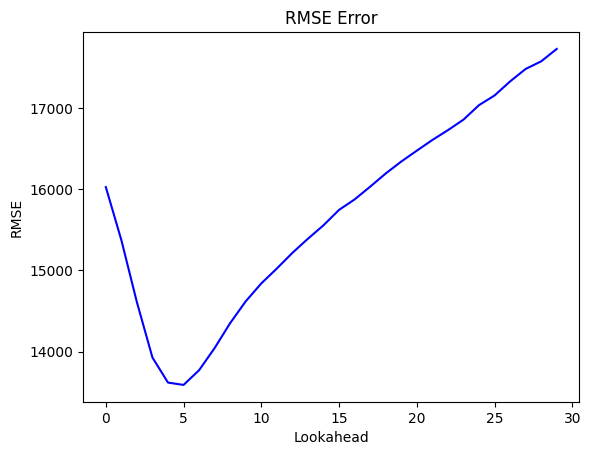

In [ ]:
# Train Set Loss
pred = lstm_model.predict([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

5/5 [==============================] - 0s 12ms/step
Average RMSE: 10192.6791


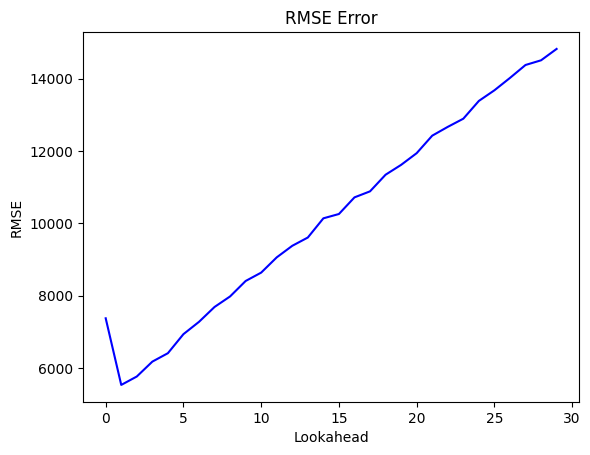

In [ ]:
# Test Set Loss
pred = lstm_model.predict([test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

In [ ]:
lstm_model_miss_aware.fit([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 35s 31ms/step - loss: 45.1425 - add_211_loss: 1.3549 - add_213_loss: 1.3072 - add_215_loss: 1.2757 - add_217_loss: 1.2675 - add_219_loss: 1.2665 - add_221_loss: 1.2684 - add_223_loss: 1.2721 - add_225_loss: 1.2757 - add_227_loss: 1.2763 - add_229_loss: 1.2794 - add_231_loss: 1.2783 - add_233_loss: 1.2799 - add_235_loss: 1.2792 - add_237_loss: 1.2809 - add_239_loss: 1.2817 - add_241_loss: 1.2828 - add_243_loss: 1.2844 - add_245_loss: 1.2849 - add_247_loss: 1.2902 - add_249_loss: 1.2910 - add_251_loss: 1.2978 - add_253_loss: 1.2984 - add_255_loss: 1.3080 - add_257_loss: 1.3114 - add_259_loss: 1.3170 - add_261_loss: 1.3280 - add_263_loss: 1.3379 - add_265_loss: 1.3389 - add_267_loss: 1.3511 - add_269_loss: 1.3563
Epoch 2/30
34/34 [==============================] - 1s 33ms/step - loss: 44.5505 - add_211_loss: 1.2658 - add_213_loss: 1.2647 - add_215_loss: 1.2597 - add_217_loss: 1.2632 - add_219_loss: 1.2666 - add_221_loss: 1.2705 - add_223

34/34 [==============================] - 16s 28ms/step
Average RMSE: 14446.9057


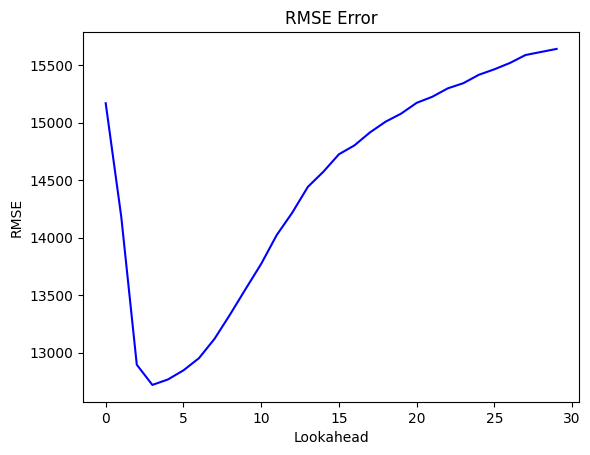

In [ ]:
# Train Set Loss
pred = lstm_model_miss_aware.predict([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

5/5 [==============================] - 0s 22ms/step
Average RMSE: 9942.2295


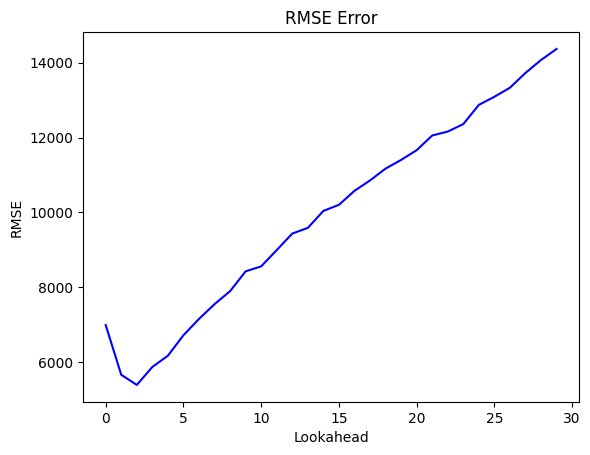

In [ ]:
# Test Set Loss
pred = lstm_model_miss_aware.predict([test_lstm_miss, test_lstm_pres, test_label_lstm, test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

## Mean Imputation

In [ ]:
x_reshaper = tf.keras.layers.Reshape((1, 4))
y_reshaper = tf.keras.layers.Reshape((1, 4))

layer_a_reverse = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

x_reshaper_ = tf.keras.layers.Reshape((1, 4))
y_reshaper_ = tf.keras.layers.Reshape((1, 4))

layer_a_reverse_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat_ = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda_ = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out_ = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')


In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_set = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()

train_set_missing = np.random.random(train_set.shape) < 0.2
test_set_missing = np.random.random(test_set.shape) < 0.2

for i in range(4):
  train_set[:, i][train_set_missing[:, i]] = np.mean(train_set[:, i])
  test_set[:, i][test_set_missing[:, i]] = np.mean(test_set[:, i])

scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Missing in Train Set: {round(np.count_nonzero(train_set_missing) / train_set_missing.ravel().shape[0] * 100, 2)}%')
print(f'Missing in Test Set: {round(np.count_nonzero(test_set_missing) / test_set_missing.ravel().shape[0] * 100, 2)}%')

Shape of Train Set: (1096, 4)
Shape of Test Set: (151, 4)
Missing in Train Set: 20.62%
Missing in Test Set: 22.68%


In [ ]:
window_size = 30

In [ ]:
train_lstm = []
train_label_lstm = []
train_lstm_miss = []
for i in range(train_set_scaled.shape[0] - window_size):
    train_lstm.append(train_set_scaled[i].reshape((1, -1)))
    train_lstm_miss.append(train_set_missing[i+1:i+window_size+1])
    train_label_lstm.append(train_set_scaled[i+1:i+window_size+1])
train_lstm = np.array(train_lstm)
train_label_lstm = np.array(train_label_lstm)
train_lstm_miss = np.array(train_lstm_miss)
train_lstm_pres = 1 - train_lstm_miss

test_lstm = []
test_label_lstm = []
test_lstm_miss = []
for i in range(test_set_scaled.shape[0] - window_size):
    test_lstm.append(test_set_scaled[i].reshape((1, -1)))
    test_label_lstm.append(test_set_scaled[i+1:i+window_size+1])
    test_lstm_miss.append(test_set_missing[i+1:i+window_size+1])

test_lstm = np.array(test_lstm)
test_label_lstm = np.array(test_label_lstm)
test_lstm_miss = np.array(test_lstm_miss)
test_lstm_pres = 1 - test_lstm_miss

print(f'Train Set Shape: {train_lstm.shape}')
print(f'Train Label Shape: {train_label_lstm.shape}')
print(f'Test Set Shape: {test_lstm.shape}')
print(f'Test Label Shape: {test_label_lstm.shape}')

Train Set Shape: (1066, 1, 4)
Train Label Shape: (1066, 30, 4)
Test Set Shape: (121, 1, 4)
Test Label Shape: (121, 30, 4)


In [ ]:
lstm_model = get_lstm_model(window_size)
lstm_model_miss_aware = get_lstm_model_miss_aware(window_size)

In [ ]:
lstm_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))
lstm_model_miss_aware.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))

In [ ]:
lstm_model.fit([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 33s 34ms/step - loss: 28.2295 - l9_loss: 0.5972 - l9_1_loss: 0.6801 - l9_2_loss: 0.7202 - l9_3_loss: 0.7351 - l9_4_loss: 0.7310 - l9_5_loss: 0.7213 - l9_6_loss: 0.7163 - l9_7_loss: 0.7153 - l9_8_loss: 0.7158 - l9_9_loss: 0.7167 - l9_10_loss: 0.7176 - l9_11_loss: 0.7185 - l9_12_loss: 0.7194 - l9_13_loss: 0.7203 - l9_14_loss: 0.7214 - l9_15_loss: 0.7228 - l9_16_loss: 0.7246 - l9_17_loss: 0.7267 - l9_18_loss: 0.7292 - l9_19_loss: 0.7322 - l9_20_loss: 0.7359 - l9_21_loss: 0.7405 - l9_22_loss: 0.7455 - l9_23_loss: 0.7510 - l9_24_loss: 0.7580 - l9_25_loss: 0.7671 - l9_26_loss: 0.7771 - l9_27_loss: 0.7864 - l9_28_loss: 0.7962 - l9_29_loss: 0.8089
Epoch 2/30
34/34 [==============================] - 1s 32ms/step - loss: 19.8114 - l9_loss: 0.4060 - l9_1_loss: 0.4565 - l9_2_loss: 0.4825 - l9_3_loss: 0.4782 - l9_4_loss: 0.4650 - l9_5_loss: 0.4537 - l9_6_loss: 0.4458 - l9_7_loss: 0.4415 - l9_8_loss: 0.4396 - l9_9_loss: 0.4391 - l9_10_loss: 0.4392 

34/34 [==============================] - 7s 13ms/step
Average RMSE: 10569.2792


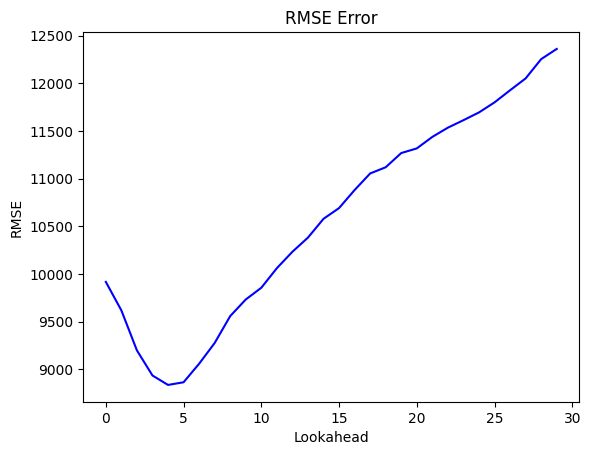

In [ ]:
# Train Set Loss
pred = lstm_model.predict([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

4/4 [==============================] - 0s 13ms/step
Average RMSE: 3740.0052


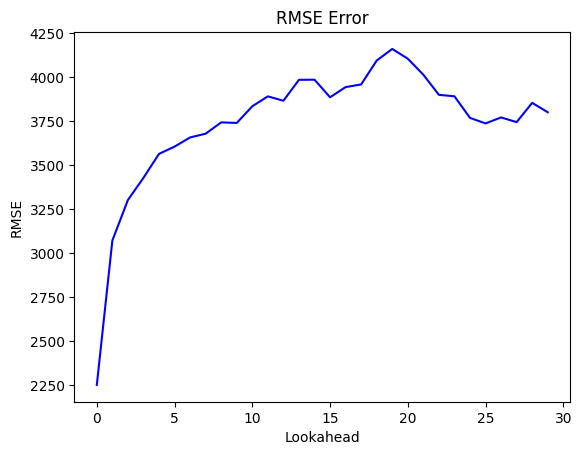

In [ ]:
# Test Set Loss
pred = lstm_model.predict([test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

In [ ]:
lstm_model_miss_aware.fit([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 39s 34ms/step - loss: 26.7594 - add_286_loss: 0.6944 - add_288_loss: 0.6969 - add_290_loss: 0.7066 - add_292_loss: 0.7027 - add_294_loss: 0.6922 - add_296_loss: 0.6901 - add_298_loss: 0.6810 - add_300_loss: 0.6743 - add_302_loss: 0.6728 - add_304_loss: 0.6774 - add_306_loss: 0.6750 - add_308_loss: 0.6772 - add_310_loss: 0.6788 - add_312_loss: 0.6778 - add_314_loss: 0.6802 - add_316_loss: 0.6737 - add_318_loss: 0.6846 - add_320_loss: 0.6814 - add_322_loss: 0.6847 - add_324_loss: 0.6821 - add_326_loss: 0.6821 - add_328_loss: 0.6937 - add_330_loss: 0.6931 - add_332_loss: 0.6926 - add_334_loss: 0.6931 - add_336_loss: 0.6951 - add_338_loss: 0.7002 - add_340_loss: 0.7031 - add_342_loss: 0.7041 - add_344_loss: 0.7144
Epoch 2/30
34/34 [==============================] - 1s 34ms/step - loss: 20.5012 - add_286_loss: 0.5429 - add_288_loss: 0.4933 - add_290_loss: 0.4790 - add_292_loss: 0.4735 - add_294_loss: 0.4712 - add_296_loss: 0.4714 - add_298

34/34 [==============================] - 9s 20ms/step
Average RMSE: 10158.833


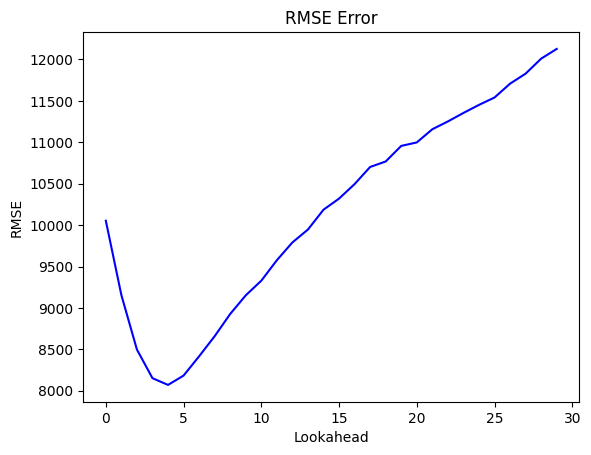

In [ ]:
# Train Set Loss
pred = lstm_model_miss_aware.predict([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

4/4 [==============================] - 0s 17ms/step
Average RMSE: 4528.0005


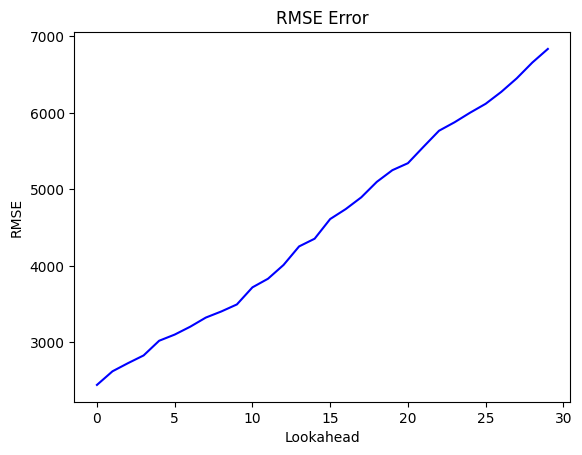

In [ ]:
# Test Set Loss
pred = lstm_model_miss_aware.predict([test_lstm_miss, test_lstm_pres, test_label_lstm, test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

## Exponential Moving Average

In [ ]:
x_reshaper = tf.keras.layers.Reshape((1, 4))
y_reshaper = tf.keras.layers.Reshape((1, 4))

layer_a_reverse = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

x_reshaper_ = tf.keras.layers.Reshape((1, 4))
y_reshaper_ = tf.keras.layers.Reshape((1, 4))

layer_a_reverse_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat_ = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda_ = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out_ = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')


In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_set = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()

train_set_missing = np.random.random(train_set.shape) < 0.2
test_set_missing = np.random.random(test_set.shape) < 0.2

epsilon = 0.6
avg = train_set[0, :]
for i in range(1, train_set.shape[0]):
  train_set[i, :][train_set_missing[i, :]] = avg[train_set_missing[i, :]]
  avg = epsilon * avg + (1 - epsilon) * train_set[i, :]
avg = test_set[0, :]
for i in range(1, test_set.shape[0]):
  test_set[i, :][test_set_missing[i, :]] = avg[test_set_missing[i, :]]
  avg = epsilon * avg + (1 - epsilon) * test_set[i, :]

scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Missing in Train Set: {round(np.count_nonzero(train_set_missing) / train_set_missing.ravel().shape[0] * 100, 2)}%')
print(f'Missing in Test Set: {round(np.count_nonzero(test_set_missing) / test_set_missing.ravel().shape[0] * 100, 2)}%')

Shape of Train Set: (1096, 4)
Shape of Test Set: (181, 4)
Missing in Train Set: 20.21%
Missing in Test Set: 18.51%


In [ ]:
window_size = 30

In [ ]:
train_lstm = []
train_label_lstm = []
train_lstm_miss = []
for i in range(train_set_scaled.shape[0] - window_size):
    train_lstm.append(train_set_scaled[i].reshape((1, -1)))
    train_lstm_miss.append(train_set_missing[i+1:i+window_size+1])
    train_label_lstm.append(train_set_scaled[i+1:i+window_size+1])
train_lstm = np.array(train_lstm)
train_label_lstm = np.array(train_label_lstm)
train_lstm_miss = np.array(train_lstm_miss)
train_lstm_pres = 1 - train_lstm_miss

test_lstm = []
test_label_lstm = []
test_lstm_miss = []
for i in range(test_set_scaled.shape[0] - window_size):
    test_lstm.append(test_set_scaled[i].reshape((1, -1)))
    test_label_lstm.append(test_set_scaled[i+1:i+window_size+1])
    test_lstm_miss.append(test_set_missing[i+1:i+window_size+1])

test_lstm = np.array(test_lstm)
test_label_lstm = np.array(test_label_lstm)
test_lstm_miss = np.array(test_lstm_miss)
test_lstm_pres = 1 - test_lstm_miss

print(f'Train Set Shape: {train_lstm.shape}')
print(f'Train Label Shape: {train_label_lstm.shape}')
print(f'Test Set Shape: {test_lstm.shape}')
print(f'Test Label Shape: {test_label_lstm.shape}')

Train Set Shape: (1066, 1, 4)
Train Label Shape: (1066, 30, 4)
Test Set Shape: (151, 1, 4)
Test Label Shape: (151, 30, 4)


In [ ]:
lstm_model = get_lstm_model(window_size)
lstm_model_miss_aware = get_lstm_model_miss_aware(window_size)

In [ ]:
lstm_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))
lstm_model_miss_aware.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))

In [ ]:
lstm_model.fit([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 30s 30ms/step - loss: 24.8672 - l9_loss: 0.6637 - l9_1_loss: 0.6073 - l9_2_loss: 0.6479 - l9_3_loss: 0.6550 - l9_4_loss: 0.6494 - l9_5_loss: 0.6299 - l9_6_loss: 0.6116 - l9_7_loss: 0.5983 - l9_8_loss: 0.5882 - l9_9_loss: 0.5810 - l9_10_loss: 0.5748 - l9_11_loss: 0.5692 - l9_12_loss: 0.5640 - l9_13_loss: 0.5592 - l9_14_loss: 0.5551 - l9_15_loss: 0.5520 - l9_16_loss: 0.5505 - l9_17_loss: 0.5506 - l9_18_loss: 0.5527 - l9_19_loss: 0.5571 - l9_20_loss: 0.5641 - l9_21_loss: 0.5745 - l9_22_loss: 0.5887 - l9_23_loss: 0.6077 - l9_24_loss: 0.6341 - l9_25_loss: 0.6702 - l9_26_loss: 0.7154 - l9_27_loss: 0.7654 - l9_28_loss: 0.8114 - l9_29_loss: 0.8597
Epoch 2/30
34/34 [==============================] - 1s 31ms/step - loss: 13.4508 - l9_loss: 0.4526 - l9_1_loss: 0.4065 - l9_2_loss: 0.4004 - l9_3_loss: 0.3644 - l9_4_loss: 0.3107 - l9_5_loss: 0.2672 - l9_6_loss: 0.2371 - l9_7_loss: 0.2177 - l9_8_loss: 0.2065 - l9_9_loss: 0.2008 - l9_10_loss: 0.1979 

34/34 [==============================] - 8s 11ms/step
Average RMSE: 8600.4043


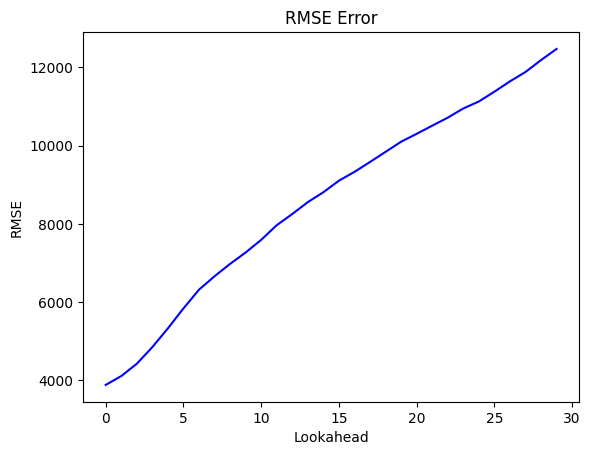

In [ ]:
# Train Set Loss
pred = lstm_model.predict([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

5/5 [==============================] - 0s 15ms/step
Average RMSE: 5113.1692


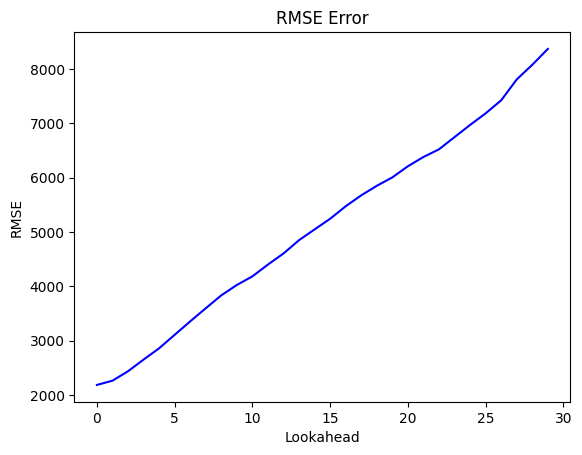

In [ ]:
# Test Set Loss
pred = lstm_model.predict([test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

In [ ]:
lstm_model_miss_aware.fit([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 33s 31ms/step - loss: 29.2196 - add_391_loss: 0.7246 - add_393_loss: 0.7316 - add_395_loss: 0.7648 - add_397_loss: 0.7658 - add_399_loss: 0.7652 - add_401_loss: 0.7685 - add_403_loss: 0.7679 - add_405_loss: 0.7702 - add_407_loss: 0.7685 - add_409_loss: 0.7696 - add_411_loss: 0.7687 - add_413_loss: 0.7690 - add_415_loss: 0.7697 - add_417_loss: 0.7694 - add_419_loss: 0.7695 - add_421_loss: 0.7699 - add_423_loss: 0.7694 - add_425_loss: 0.7689 - add_427_loss: 0.7701 - add_429_loss: 0.7701 - add_431_loss: 0.7714 - add_433_loss: 0.7729 - add_435_loss: 0.7753 - add_437_loss: 0.7807 - add_439_loss: 0.7805 - add_441_loss: 0.7869 - add_443_loss: 0.7951 - add_445_loss: 0.8068 - add_447_loss: 0.8148 - add_449_loss: 0.8142
Epoch 2/30
34/34 [==============================] - 2s 53ms/step - loss: 23.0852 - add_391_loss: 0.4475 - add_393_loss: 0.5453 - add_395_loss: 0.6157 - add_397_loss: 0.6215 - add_399_loss: 0.6015 - add_401_loss: 0.5874 - add_403

34/34 [==============================] - 8s 20ms/step
Average RMSE: 8767.8508


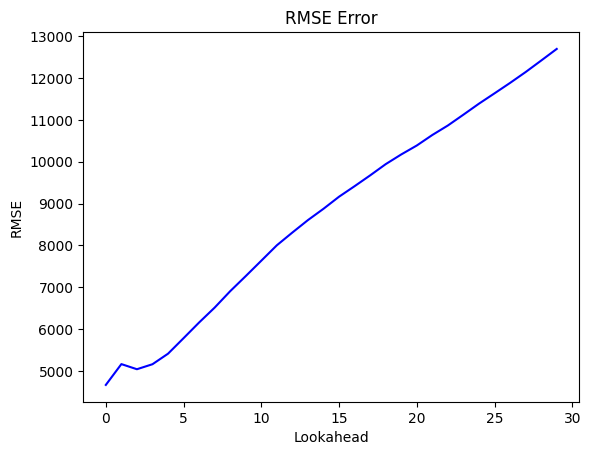

In [ ]:
# Train Set Loss
pred = lstm_model_miss_aware.predict([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

5/5 [==============================] - 0s 18ms/step
Average RMSE: 4949.4196


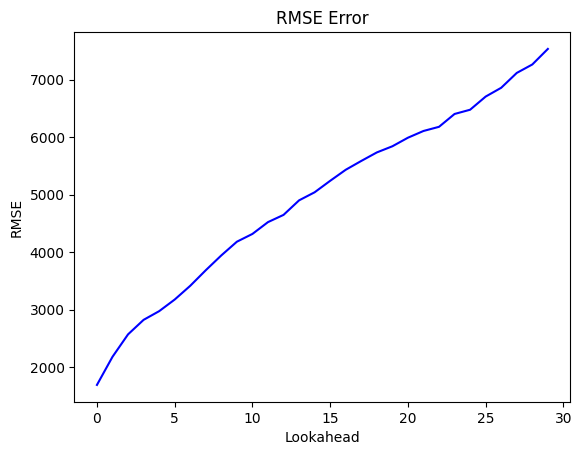

In [ ]:
# Test Set Loss
pred = lstm_model_miss_aware.predict([test_lstm_miss, test_lstm_pres, test_label_lstm, test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

## Encoder Decoder

In [ ]:
x_reshaper = tf.keras.layers.Reshape((1, 4))
y_reshaper = tf.keras.layers.Reshape((1, 4))

layer_a_reverse = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')

x_reshaper_ = tf.keras.layers.Reshape((1, 4))
y_reshaper_ = tf.keras.layers.Reshape((1, 4))

layer_a_reverse_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l1')
layer_o1_x_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_initializer='he_normal', name='l2')
layer_concat_ = tf.keras.layers.Concatenate(axis=-1, name='l3')
layer_ug_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l4')
layer_fg_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l5')
layer_a_ = tf.keras.layers.Dense(units=hidden_units, activation='leaky_relu', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l6')
layer_c_tilda_ = tf.keras.layers.Dense(units=hidden_units, activation='tanh', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l7')
layer_a_sigmoid_ = tf.keras.layers.Dense(units=hidden_units, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01), kernel_initializer='he_normal', name='l8')
layer_out_ = tf.keras.layers.Dense(units=4, kernel_initializer='he_normal', name='l9')


In [ ]:
# Load and prepare data
df = pd.read_csv('BTC-USD.csv')
df.dropna(axis=0, inplace=True)

df_test = pd.read_csv('BTC-USD_test.csv')

In [ ]:
train_set = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
test_set = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()

t_a = df[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()
te_a = df_test[['Open', 'High', 'Low', 'Close']][:-1].to_numpy()

train_set_missing = np.random.random(train_set.shape) < 0.2
test_set_missing = np.random.random(test_set.shape) < 0.2

# for i in range(4):
#   train_set[:, i][np.where(train_set_missing[:, i])] = np.mean(train_set[:, i])
  # test_set[:, i][np.where(test_set_missing[:, i])] = np.mean(test_set[:, i])

epsilon = 0.6
avg = train_set[0, :]
for i in range(1, train_set.shape[0]):
  train_set[i, :][np.where(train_set_missing[i, :])] = avg[np.where(train_set_missing[i, :])]
  avg = epsilon * avg + (1 - epsilon) * train_set[i, :]
avg = test_set[0, :]
for i in range(1, test_set.shape[0]):
  test_set[i, :][np.where(test_set_missing[i, :])] = avg[np.where(test_set_missing[i, :])]
  avg = epsilon * avg + (1 - epsilon) * test_set[i, :]


# scaler = StandardScaler()
# scaler.fit_transform(train_set)
# train_set_scaled = scaler.transform(train_set)
# test_set_scaled = scaler.transform(test_set)

print(f'Shape of Train Set: {train_set.shape}')
print(f'Shape of Test Set: {test_set.shape}')
print(f'Missing in Train Set: {round(np.count_nonzero(train_set_missing) / train_set_missing.ravel().shape[0] * 100, 2)}%')
print(f'Missing in Test Set: {round(np.count_nonzero(test_set_missing) / test_set_missing.ravel().shape[0] * 100, 2)}%')

Shape of Train Set: (1096, 4)
Shape of Test Set: (151, 4)
Missing in Train Set: 21.37%
Missing in Test Set: 22.52%


In [ ]:
# Trying Encoding Decoding Framework with zero imputation
# Design Encoder
hidden_states = 64
features = 4
window_size = 30

rnn_x = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01), name='DenseLayer1', activation='leaky_relu')
rnn_h = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01), name='DenseLayer2', activation='tanh')
out_layer = tf.keras.layers.Dense(units=features, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01), name='DenseLayer3', activation='tanh')
out_layer2 = tf.keras.layers.Dense(units=features, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.01), name='DenseLayer3_2', activation='linear')

fc_out = tf.keras.layers.Dense(units=hidden_states, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.L2(0.005), name='DenseLayer4')
concat_reshaper = tf.keras.layers.Reshape((1, hidden_states), name='Reshaper')
concat_reshaper_x = tf.keras.layers.Reshape((1, features), name='ReshaperX')

def get_RNN_unit(hidden_states=hidden_states, features=features, decoder=False):
    h_old = tf.keras.Input((1, hidden_states))
    x = tf.keras.Input((1,features))

    h = rnn_x(x)
    h = tf.keras.layers.concatenate([concat_reshaper(h), concat_reshaper(h_old)], axis=-1)
    h_new = rnn_h(h)

    if decoder:
        out = out_layer2(h)
    else:
        out = out_layer(h)
    return tf.keras.Model(inputs=[x, h_old], outputs=[h_new, out])

def get_encoder(window_size=window_size, features=features, hidden_states=hidden_states, get_pred=False):
    X = tf.keras.Input((window_size, features))
    h0_forward = tf.keras.Input((1, hidden_states))
    h0_backward = tf.keras.Input((1, hidden_states))
    missing_points = tf.keras.Input((window_size, features))
    present_points = tf.keras.Input((window_size, features))

    rnn_cell = get_RNN_unit(hidden_states, features)
    rnn_cell_decode = get_RNN_unit(hidden_states, features, True)

    h_old = h0_forward
    h_old_ = h0_backward
    forward_outs = []
    backward_outs = []
    # Forward Pass
    for i in range(window_size//2):
        h_old, out = rnn_cell([concat_reshaper_x(X[:, i, :]), h_old])
        forward_outs.append(out)

    # Backward Pass
    for i in range(window_size//2, window_size):
        h_old_, out = rnn_cell([concat_reshaper_x(X[:, i, :]), h_old_])
        backward_outs.append(out)

    final_outs = []
    for i, j, k in zip(forward_outs, backward_outs, range(len(backward_outs))):
        o = tf.keras.layers.concatenate([concat_reshaper_x(i), concat_reshaper_x(j)], axis=-1)
        o = fc_out(o)
        _, out = rnn_cell_decode([concat_reshaper_x(X[:, k, :]), o])

        if not get_pred:
          # Rectify non-missing values
          o1 = tf.math.multiply(concat_reshaper_x(X[:, k, :]), concat_reshaper_x(present_points[:, k, :]))
          o2 = tf.math.multiply(out, concat_reshaper_x(missing_points[:, k, :]))

          o1 = concat_reshaper_x(o1)
          o2 = concat_reshaper_x(o2)

          out = tf.keras.layers.add([o1, o2])

          out = concat_reshaper_x(out)
        final_outs.append(out)

    return tf.keras.Model(inputs=[X, h0_forward, h0_backward, missing_points, present_points], outputs=final_outs)

In [ ]:
train_new_miss = np.random.random(train_set.shape) < 0.3
train_new_miss = train_new_miss & (1 - train_set_missing)

train_set_new = np.copy(train_set)

epsilon = 0.6
avg = train_set_new[0, :]
for i in range(1, train_set_new.shape[0]):
  train_set_new[i, :][np.where(train_new_miss[i, :])] = avg[np.where(train_new_miss[i, :])]
  avg = epsilon * avg + (1 - epsilon) * train_set_new[i, :]

# for i in range(4):
#   train_set_new[:, i][np.where(train_new_miss[:, i])] = np.mean(train_set_new[:, i])

miss = train_new_miss | train_set_missing

In [ ]:
encoder = get_encoder()

In [ ]:
encoder.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))

In [ ]:
dataset = []
datalabels = []
datamissing = []
datamissing_actual = []

for i in range(train_set.shape[0] - window_size//2):
    datalabels.append(train_set[i:i+window_size//2])
    temp = train_set_new[i:i+window_size//2].tolist()
    temp2 = temp.copy()
    temp.reverse()
    temp = np.array([*temp2, *temp])
    dataset.append(temp)
    temp3 = miss[i:i+window_size//2].tolist()
    temp4 = temp3.copy()
    temp4.reverse()
    datamissing.append(np.array([*temp3, *temp4]))
    datamissing_actual.append(train_new_miss[i:i+window_size//2])
dataset = np.array(dataset)
datalabels = np.array(datalabels)
datamissing = np.array(datamissing)
datamissing_actual = np.array(datamissing_actual)




permutations = np.random.permutation(dataset.shape[0])
train_ratio = 0.9
train_set_ = dataset[permutations[:int(train_ratio * permutations.shape[0])]]
train_labels_ = datalabels[permutations[:int(train_ratio * permutations.shape[0])]]
train_missing = datamissing[permutations[:int(train_ratio * permutations.shape[0])]]
train_actual_missing = datamissing_actual[permutations[:int(train_ratio * permutations.shape[0])]]

test_set_ = dataset[permutations[int(train_ratio * permutations.shape[0]):]]
test_labels = datalabels[permutations[int(train_ratio * permutations.shape[0]):]]
test_missing = datamissing[permutations[int(train_ratio * permutations.shape[0]):]]
test_actual_missing = datamissing_actual[permutations[int(train_ratio * permutations.shape[0]):]]

test_labels = np.array(test_labels, dtype='float32')
train_labels_ = np.array(train_labels_, dtype='float32')
print(f'Train Set: {train_set_.shape}')
print(f'Train Label: {train_labels_.shape}')
print(f'Test Set: {test_set_.shape}')
print(f'Test Label: {test_labels.shape}')

Train Set: (972, 30, 4)
Train Label: (972, 15, 4)
Test Set: (109, 30, 4)
Test Label: (109, 15, 4)


In [ ]:
encoder.fit([train_set_, np.zeros((train_set_.shape[0], 1, hidden_states)), np.zeros((train_set_.shape[0], 1, hidden_states)), train_missing, 1 - train_missing], train_labels_, epochs=30, batch_size=32)

Epoch 1/30
31/31 [==============================] - 25s 19ms/step - loss: 9809013760.0000 - ReshaperX_loss: 654688448.0000 - ReshaperX_1_loss: 651329344.0000 - ReshaperX_2_loss: 641822656.0000 - ReshaperX_3_loss: 647719232.0000 - ReshaperX_4_loss: 645168448.0000 - ReshaperX_5_loss: 648936768.0000 - ReshaperX_6_loss: 647584384.0000 - ReshaperX_7_loss: 661534464.0000 - ReshaperX_8_loss: 635396032.0000 - ReshaperX_9_loss: 673341184.0000 - ReshaperX_10_loss: 661792960.0000 - ReshaperX_11_loss: 651088064.0000 - ReshaperX_12_loss: 662638848.0000 - ReshaperX_13_loss: 668195328.0000 - ReshaperX_14_loss: 657778048.0000
Epoch 2/30
31/31 [==============================] - 1s 20ms/step - loss: 2967717888.0000 - ReshaperX_loss: 196691936.0000 - ReshaperX_1_loss: 196505856.0000 - ReshaperX_2_loss: 194010608.0000 - ReshaperX_3_loss: 198735840.0000 - ReshaperX_4_loss: 196256096.0000 - ReshaperX_5_loss: 198541408.0000 - ReshaperX_6_loss: 193528816.0000 - ReshaperX_7_loss: 202040448.0000 - ReshaperX_8_l

In [ ]:
pred = encoder.predict([train_set_, np.zeros((train_set_.shape[0], 1, hidden_states)), np.zeros((train_set_.shape[0], 1, hidden_states)), train_missing, 1 - train_missing])

31/31 [==============================] - 8s 8ms/step


In [ ]:
# Get Value at locations with missing data and check loss
temp = train_actual_missing[:, :15, :]
pred_np = np.concatenate([x for x in pred], axis=1)

In [ ]:
print('Train MSE =', np.sum(np.square(pred_np[np.where(temp == 1)] - train_labels_[np.where(temp == 1)])) / np.count_nonzero(temp == 1))
print('Train RMSE =', np.sum(np.sqrt(np.square(pred_np[np.where(temp == 1)] - train_labels_[np.where(temp == 1)])) / np.count_nonzero(temp == 1)))

Train MSE = 2107809.0950219724
Train RMSE = 904.07574


In [ ]:
pred = encoder.predict([test_set_, np.zeros((test_set_.shape[0], 1, hidden_states)), np.zeros((test_set_.shape[0], 1, hidden_states)), test_missing, 1 - test_missing])

4/4 [==============================] - 0s 9ms/step


In [ ]:
# Get Value at locations with missing data and check loss
temp = 1 - test_actual_missing[:, :15, :]
pred_np = np.concatenate([x for x in pred], axis=1)

In [ ]:
print('Test MSE =', np.sum(np.square(pred_np[np.where(temp == 0)] - test_labels[np.where(temp == 0)])) / np.count_nonzero(temp == 0))
print('Test RMSE =', np.sum(np.sqrt(np.square(pred_np[np.where(temp == 0)] - test_labels[np.where(temp == 0)])) / np.count_nonzero(temp == 0)))

Test MSE = 2167825.512437811
Test RMSE = 930.4637


In [ ]:
predictor = get_encoder(get_pred=True)

In [ ]:
dataset = []
for i in range(train_set.shape[0] - window_size//2):
    temp = train_set[i:i+window_size//2].tolist()
    temp2 = temp.copy()
    temp.reverse()
    temp = np.array([*temp2, *temp])
    dataset.append(temp)
dataset = np.array(dataset)
pred = predictor.predict([dataset, np.zeros((dataset.shape[0], 1, hidden_states)), np.zeros((dataset.shape[0], 1, hidden_states)), np.zeros(dataset.shape), np.zeros(dataset.shape)])

34/34 [==============================] - 7s 10ms/step


In [ ]:

pred_np = []
for i in range(len(pred)):

  temp = np.zeros((1, 4))
  p = pred[i].reshape((-1, 4))
  for j in range(i):
    p = np.concatenate([temp, p], axis=0)
  for k in range(len(pred) - i):
    p = np.concatenate([p, temp], axis=0)
  pred_np.append(p)
pred_np = np.array(pred_np)

pred_np = np.sum(pred_np, axis=0)
pred_np /= len(pred)
for i in range(len(pred)):
  pred_np[i, :] /= (i+1)/15
for i in range(len(pred)):
  pred_np[len(pred_np) - 1 - i, :] /= (i+1)/15

RMSE: 1683.3355


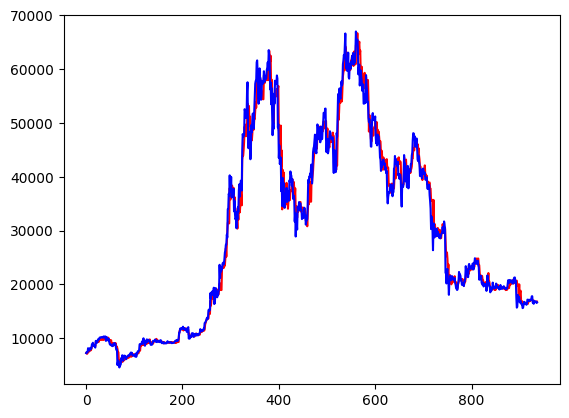

In [ ]:
plt.plot(train_set[np.where(train_set_missing)], c='r')
plt.plot(t_a[np.where(train_set_missing)], c='b')
print(f'RMSE: {round(np.sqrt(np.sum(np.square(train_set[np.where(train_set_missing)] - t_a[np.where(train_set_missing)])) / train_set.shape[0]), 4)}')

In [ ]:
train_set[train_set_missing] = pred_np[train_set_missing]

RMSE: 1140.235


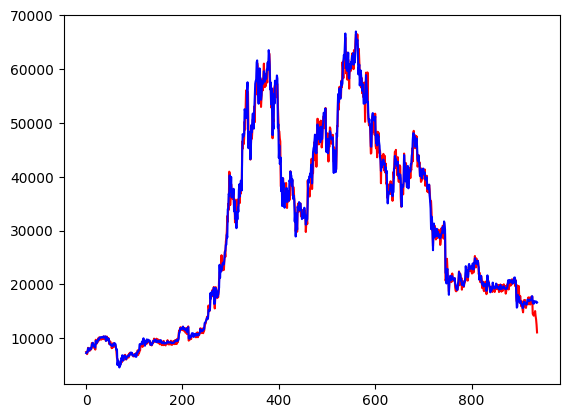

In [ ]:
plt.plot(train_set[np.where(train_set_missing)], c='r')
plt.plot(t_a[np.where(train_set_missing)], c='b')
print(f'RMSE: {round(np.sqrt(np.sum(np.square(train_set[np.where(train_set_missing)] - t_a[np.where(train_set_missing)])) / train_set.shape[0]), 4)}')

In [ ]:
dataset = []
for i in range(test_set.shape[0] - window_size//2):
    temp = test_set[i:i+window_size//2].tolist()
    temp2 = temp.copy()
    temp.reverse()
    temp = np.array([*temp2, *temp])
    dataset.append(temp)
dataset = np.array(dataset)

pred = predictor.predict([dataset, np.zeros((dataset.shape[0], 1, hidden_states)), np.zeros((dataset.shape[0], 1, hidden_states)), np.zeros(dataset.shape[0]), 1 - np.zeros(dataset.shape[0])])


5/5 [==============================] - 11s 9ms/step


In [ ]:
pred_np = []
for i in range(len(pred)):

  temp = np.zeros((1, 4))
  p = pred[i].reshape((-1, 4))
  for j in range(i):
    p = np.concatenate([temp, p], axis=0)
  for k in range(len(pred) - i):
    p = np.concatenate([p, temp], axis=0)
  pred_np.append(p)
pred_np = np.array(pred_np)

pred_np = np.sum(pred_np, axis=0)
pred_np /= len(pred)
for i in range(len(pred)):
  pred_np[i, :] /= (i+1)/15
for i in range(len(pred)):
  pred_np[len(pred_np) - 1 - i, :] /= (i+1)/15

In [ ]:
test_set[test_set_missing] = pred_np[test_set_missing]

In [ ]:
window_size = 30

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train_set)
train_set_scaled = scaler.transform(train_set)
test_set_scaled = scaler.transform(test_set)

In [ ]:
train_lstm = []
train_label_lstm = []
train_lstm_miss = []
for i in range(train_set_scaled.shape[0] - window_size):
    train_lstm.append(train_set_scaled[i].reshape((1, -1)))
    train_lstm_miss.append(train_set_missing[i+1:i+window_size+1])
    train_label_lstm.append(train_set_scaled[i+1:i+window_size+1])
train_lstm = np.array(train_lstm)
train_label_lstm = np.array(train_label_lstm)
train_lstm_miss = np.array(train_lstm_miss)
train_lstm_pres = 1 - train_lstm_miss

test_lstm = []
test_label_lstm = []
test_lstm_miss = []
for i in range(test_set_scaled.shape[0] - window_size):
    test_lstm.append(test_set_scaled[i].reshape((1, -1)))
    test_label_lstm.append(test_set_scaled[i+1:i+window_size+1])
    test_lstm_miss.append(test_set_missing[i+1:i+window_size+1])

test_lstm = np.array(test_lstm)
test_label_lstm = np.array(test_label_lstm)
test_lstm_miss = np.array(test_lstm_miss)
test_lstm_pres = 1 - test_lstm_miss

print(f'Train Set Shape: {train_lstm.shape}')
print(f'Train Label Shape: {train_label_lstm.shape}')
print(f'Test Set Shape: {test_lstm.shape}')
print(f'Test Label Shape: {test_label_lstm.shape}')

Train Set Shape: (1066, 1, 4)
Train Label Shape: (1066, 30, 4)
Test Set Shape: (121, 1, 4)
Test Label Shape: (121, 30, 4)


In [ ]:
lstm_model = get_lstm_model(window_size)
lstm_model_miss_aware = get_lstm_model_miss_aware(window_size)

In [ ]:
lstm_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))
lstm_model_miss_aware.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.0005))

In [ ]:
lstm_model.fit([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 35s 37ms/step - loss: 21.5278 - l9_loss: 0.5777 - l9_1_loss: 0.5052 - l9_2_loss: 0.5185 - l9_3_loss: 0.5195 - l9_4_loss: 0.5082 - l9_5_loss: 0.4958 - l9_6_loss: 0.4874 - l9_7_loss: 0.4825 - l9_8_loss: 0.4801 - l9_9_loss: 0.4790 - l9_10_loss: 0.4789 - l9_11_loss: 0.4795 - l9_12_loss: 0.4805 - l9_13_loss: 0.4816 - l9_14_loss: 0.4830 - l9_15_loss: 0.4846 - l9_16_loss: 0.4864 - l9_17_loss: 0.4884 - l9_18_loss: 0.4906 - l9_19_loss: 0.4934 - l9_20_loss: 0.4970 - l9_21_loss: 0.5016 - l9_22_loss: 0.5071 - l9_23_loss: 0.5135 - l9_24_loss: 0.5208 - l9_25_loss: 0.5289 - l9_26_loss: 0.5380 - l9_27_loss: 0.5479 - l9_28_loss: 0.5587 - l9_29_loss: 0.5712
Epoch 2/30
34/34 [==============================] - 1s 33ms/step - loss: 12.2627 - l9_loss: 0.2869 - l9_1_loss: 0.2415 - l9_2_loss: 0.1997 - l9_3_loss: 0.1838 - l9_4_loss: 0.1719 - l9_5_loss: 0.1665 - l9_6_loss: 0.1683 - l9_7_loss: 0.1748 - l9_8_loss: 0.1831 - l9_9_loss: 0.1905 - l9_10_loss: 0.1960 

34/34 [==============================] - 8s 12ms/step
Average RMSE: 8304.4481


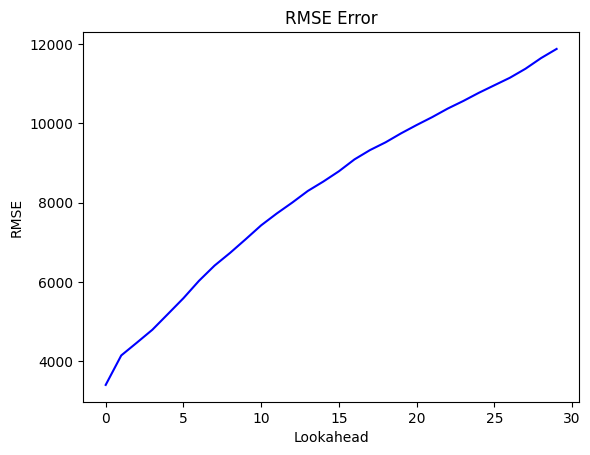

In [ ]:
# Train Set Loss
pred = lstm_model.predict([train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

4/4 [==============================] - 0s 13ms/step
Average RMSE: 4213.7383


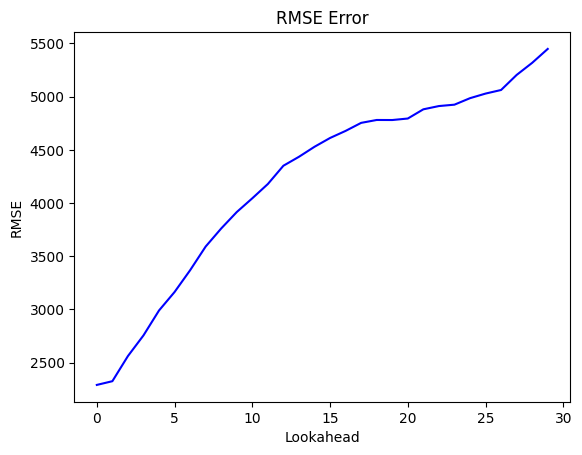

In [ ]:
# Test Set Loss
pred = lstm_model.predict([test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

In [ ]:
lstm_model_miss_aware.fit([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))], train_label_lstm, epochs=30, batch_size=32)

Epoch 1/30
34/34 [==============================] - 38s 34ms/step - loss: 24.1855 - add_196_loss: 0.5501 - add_198_loss: 0.5582 - add_200_loss: 0.5574 - add_202_loss: 0.5533 - add_204_loss: 0.5528 - add_206_loss: 0.5616 - add_208_loss: 0.5679 - add_210_loss: 0.5749 - add_212_loss: 0.5733 - add_214_loss: 0.5711 - add_216_loss: 0.5653 - add_218_loss: 0.5591 - add_220_loss: 0.5605 - add_222_loss: 0.5651 - add_224_loss: 0.5605 - add_226_loss: 0.5665 - add_228_loss: 0.5694 - add_230_loss: 0.5685 - add_232_loss: 0.5786 - add_234_loss: 0.5874 - add_236_loss: 0.5867 - add_238_loss: 0.5989 - add_240_loss: 0.6147 - add_242_loss: 0.6292 - add_244_loss: 0.6394 - add_246_loss: 0.6670 - add_248_loss: 0.6744 - add_250_loss: 0.7083 - add_252_loss: 0.7593 - add_254_loss: 0.7755
Epoch 2/30
34/34 [==============================] - 1s 34ms/step - loss: 14.9239 - add_196_loss: 0.3862 - add_198_loss: 0.3819 - add_200_loss: 0.3512 - add_202_loss: 0.3091 - add_204_loss: 0.2795 - add_206_loss: 0.2638 - add_208

34/34 [==============================] - 9s 14ms/step
Average RMSE: 8302.8423


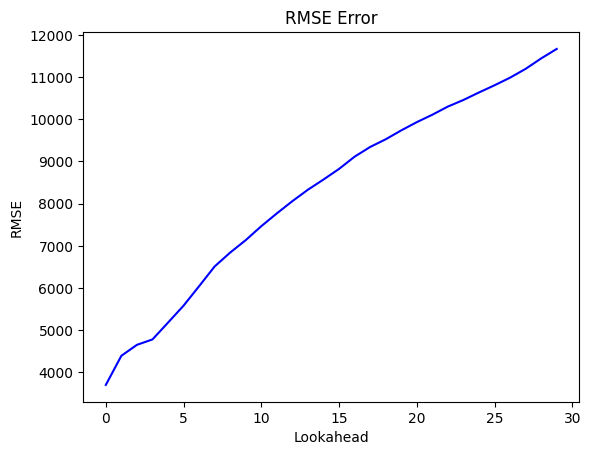

In [ ]:
# Train Set Loss
pred = lstm_model_miss_aware.predict([train_lstm_miss, train_lstm_pres, train_label_lstm, train_lstm, np.zeros((train_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[train_set_missing[i+1:i+1+pred_step.shape[0]]] = train_set[i+1:i+1+pred_step.shape[0]][train_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - train_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

4/4 [==============================] - 0s 20ms/step
Average RMSE: 4307.686


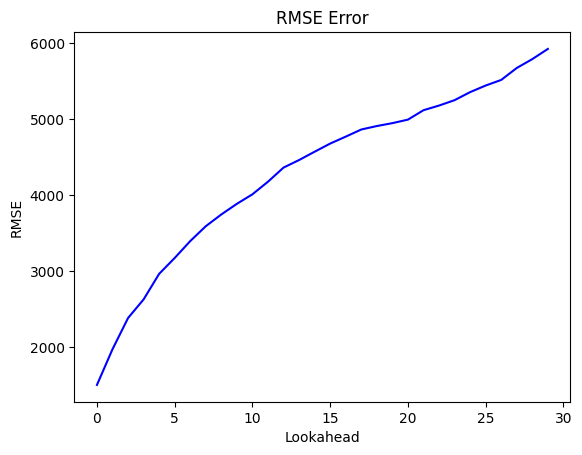

In [ ]:
# Test Set Loss
pred = lstm_model_miss_aware.predict([test_lstm_miss, test_lstm_pres, test_label_lstm, test_lstm, np.zeros((test_lstm.shape[0], 1, hidden_units))])
losses = []
for i in range(len(pred)):
  pred_step = scaler.inverse_transform(pred[i].reshape((-1, 4)))
  pred_step[test_set_missing[i+1:i+1+pred_step.shape[0]]] = test_set[i+1:i+1+pred_step.shape[0]][test_set_missing[i+1:i+1+pred_step.shape[0]]]
  rmse = np.sqrt(np.sum(np.square(pred_step - test_set[i+1:i+1+pred_step.shape[0]])) / pred_step.shape[0])
  losses.append(rmse)

ax = plt.subplot()
ax.set_title('RMSE Error')
ax.set_ylabel('RMSE')
ax.set_xlabel('Lookahead')
ax.plot(losses, c='b')

print(f'Average RMSE: {round(sum(losses) / len(losses), 4)}')

# Classification on PhysioNet Approach 1

---



In [ ]:
timescore = lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])
def set_to_df(path, fields):
    reverse_index = {k: v for v, k in enumerate(fields)}
    dataset = {}
    count = 0
    for f in os.listdir(path):
        count += 1
        with open(path+f, 'r') as temp:
            sample = {}
            prev = None
            data = np.zeros((len(reverse_index)))
            miss = np.ones((len(reverse_index)))
            timed = {}
            missing = {}

            all_rows = temp.read().strip().split('\n')
            for row in all_rows[1:]:
                cols = row.split(',')
                cur = cols[0]
                if cols[1] in ['Age', 'Gender', 'Height', 'ICUType']:
                    sample[cols[1]] = cols[2]
                    continue
                elif cols[1] == 'RecordID':
                    record_id = cols[2]
                    continue
                if prev == None:
                    prev = cur
                elif prev != cur:
                    timed[timescore(prev)] = data
                    missing[timescore(prev)] = miss
                    prev = cur
                    data = np.zeros((len(reverse_index)))
                    miss = np.ones((len(reverse_index)))
                try:
                    data[reverse_index[cols[1]]] = cols[2]
                except KeyError:
                    print(cols[1], row, f)
                miss[reverse_index[cols[1]]] = 0
            sample['timeseries'] = timed
            sample['missing'] = missing
            dataset[record_id] = sample
        if count % 100 == 0:
            print(f'Parsed Files: {count}', end='\r')
    return dataset

In [ ]:
labels = {}
with open('Data/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/Outputs-a.txt') as f:
    for row in f.read().strip().split('\n'):
        labels[row.split(',')[0]] = int(row.split(',')[1])

In [ ]:
all_fields = ['ALP', 'DiasABP', 'AST', 'Cholesterol', 'pH', 'BUN', 'K', 'WBC', 'NIMAP', 'Albumin', 'HCO3','HCT', 'PaCO2', 'SysABP', 'Mg', 'Weight', 'MAP', 'Urine', 'FiO2', 'GCS', 'SaO2', 'MechVent', 'NIDiasABP', 'RespRate', 'Temp', 'TroponinI', 'Glucose', 'Bilirubin', 'Na', 'TroponinT', 'Lactate', 'ALT', 'HR', 'PaO2', 'Creatinine', 'NISysABP', 'Platelets']

In [ ]:
dataset = set_to_df('Data/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/set-a/', all_fields)

In [ ]:
indices = np.random.permutation(len(dataset.keys()))[:5]
keys = list(dataset.keys())

x = []
y = []
y_miss = []

for i in indices:
    x.append(np.array(list(dataset[keys[i]]['timeseries'].keys())))
    y.append(np.array(list(dataset[keys[i]]['timeseries'].values())))
    y_miss.append(np.array(list(dataset[keys[i]]['missing'].values())))

NIMAP


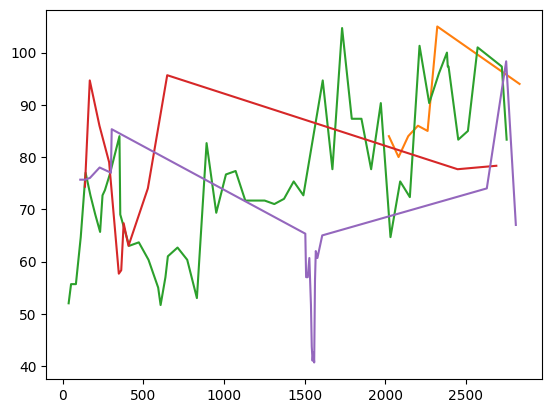

In [ ]:
axis = 8
print(all_fields[axis])

for i, j, k in zip(x, y, y_miss):
    plt.plot(i[np.where(k[:, axis] == 0)], j[:, axis][np.where(k[:, axis] == 0)])

GCS


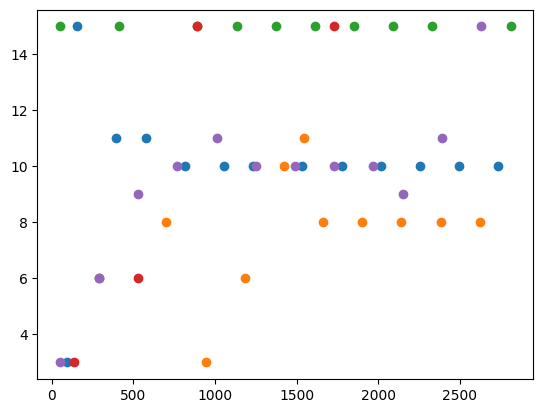

In [ ]:
axis = 19
print(all_fields[axis])

for i, j, k in zip(x, y, y_miss):
    plt.scatter(i[np.where(k[:, axis] == 0)], j[:, axis][np.where(k[:, axis] == 0)])

In [ ]:
from collections import defaultdict
counter = defaultdict(list)


def helper(x):
    counter[len(dataset[x]['missing'])].append(x)
for d in dataset:
    helper(d)

counter = dict(sorted(counter.items(), key=lambda x: x[0]))

In [ ]:
hidden_states = 64
decay_gate = tf.keras.layers.Dense(units=hidden_states, activation='relu', kernel_initializer='he_normal', name='decay_unit')
concat = tf.keras.layers.Concatenate(axis=-1, name='concat_layer')
update_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='update_gate')
forget_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='forget_gate')
a_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='a_gate')
c_tilda = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name='c_tilda')
layer_a = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name='layer_a')


def lstm_block_physionet(hidden_states=hidden_states):
    vals = tf.keras.Input(shape=(1, 37))
    miss = tf.keras.Input(shape=(1, 37))
    delta = tf.keras.Input(shape=(1, 1))

    c0 = tf.keras.Input(shape=(1, hidden_states))
    a0 = tf.keras.Input(shape=(1, hidden_states))

    decay = decay_gate(delta)
    decay = tf.math.negative(decay)
    decay = tf.math.exp(decay)
    c = tf.math.multiply(c0, decay)

    o = concat([miss, a0, vals])
    ug = update_gate(o)
    fg = forget_gate(o)
    ag = a_gate(o)

    c_temp = c_tilda(o)

    update_term = tf.math.multiply(c, ug)
    forget_term = tf.math.multiply(c_temp, fg)

    c_next = tf.keras.layers.add([update_term, forget_term])
    a_next = layer_a(c_next)
    a_next = tf.math.multiply(ag, a_next)

    return tf.keras.Model(inputs=[vals, miss, delta, c0, a0], outputs=[c_next, a_next], name='LSTMCell')

LSTMCell = lstm_block_physionet()
x_reshaper = tf.keras.layers.Reshape((1, 37))
hidden_reshaper = tf.keras.layers.Reshape((1, hidden_states))
delta_reshaper = tf.keras.layers.Reshape((1, 1))

initial_c = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name="layer_c0")
layer_fc = tf.keras.layers.Dense(units=37, activation='tanh', kernel_initializer='he_normal')
out_layer = tf.keras.layers.Dense(units=2, activation='linear', kernel_initializer='he_normal')
def get_model_physionet(avail_measurements):
    X = tf.keras.Input((avail_measurements, 37))
    XMiss = tf.keras.Input((avail_measurements, 37))
    ini = tf.keras.Input((1, 7))
    A = tf.keras.Input((1, hidden_states))
    time_deltas = tf.keras.Input((avail_measurements, 1))
    c = initial_c(ini)
    a = A
    for i in range(avail_measurements):
        x = X[:, i, :]
        xMiss = XMiss[:, i, :]
        d = time_deltas[:, i, :]
        x = x_reshaper(x)
        xMiss = x_reshaper(xMiss)
        d = delta_reshaper(d)
        c = hidden_reshaper(c)
        a = hidden_reshaper(a)

        c, a = LSTMCell([x, xMiss, d, c, a])

    a = layer_fc(a)
    out = out_layer(a)

    return tf.keras.Model(inputs=[X, XMiss, ini, A, time_deltas], outputs=out)

In [ ]:
parsed_dataset = {}
icus = {'1': [1, 0, 0, 0], '2':[0, 1, 0, 0], '3':[0, 0, 1, 0], '4':[0, 0, 0, 1]}
for t, v in counter.items():
    dataX = []
    dataXMiss = []
    dataIni = []
    dataTimeDeltas = []
    dataLabels = []

    for key in v:
        dataLabels.append(labels[key])
        ini = [int(dataset[key]['Age']), int(dataset[key]['Gender']), float(dataset[key]['Height']), *icus[dataset[key]['ICUType']]]
        times = sorted(list(dataset[key]['timeseries'].keys()))
        prev = 0

        x = []
        m = []
        d = []
        for k in times:
            x.append(dataset[key]['timeseries'][k])
            m.append(dataset[key]['missing'][k])
            d.append(k - prev)
            k = prev
        dataX.append(np.array(x))
        dataXMiss.append(np.array(m))
        dataIni.append(np.array(ini))
        dataTimeDeltas.append(np.array(d))
    parsed_dataset[t] = {
        'dataX': np.array(dataX),
        'dataXMiss': np.array(dataXMiss),
        'dataIni': np.array(dataIni).reshape(-1, 1, 7),
        'dataTimeDeltas': np.array(dataTimeDeltas).reshape(len(dataTimeDeltas), -1, 1),
        'dataLabels': np.array(dataLabels)
    }

In [ ]:
height = []
ages = []
for x in parsed_dataset.values():
  height.extend(x['dataIni'][:, 0, 2].ravel().tolist())
  ages.extend(x['dataIni'][:, 0, 0].ravel().tolist())
height = np.array(height)
ages = np.array(ages)

for k, v in parsed_dataset.items():
  parsed_dataset[k]['dataIni'][:, 0, 0] = (parsed_dataset[k]['dataIni'][:, 0, 0] - ages.mean()) / ages.std()
  parsed_dataset[k]['dataIni'][:, 0, 2] = (parsed_dataset[k]['dataIni'][:, 0, 2] - height.mean()) / height.std()


In [ ]:
def normalized(x):
  temp = x - x.mean(axis=1).reshape(x.shape[0], 1, x.shape[2])
  std = x.std(axis=1).reshape(x.shape[0], 1, x.shape[2])
  std[np.where(std == 0)] = 1
  return temp / std

In [ ]:
def train_model(data, used_keys=None, epochs=10):
    for e in range(epochs):
        counter = 0
        if used_keys is None:
          for k, v in data.items():
            model = get_model_physionet(k)
            model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001))
            model.fit(x=[data[k]['dataX'], data[k]['dataXMiss'], data[k]['dataIni'], np.zeros((data[k]['dataX'].shape[0], 1, hidden_states)), data[k]['dataTimeDeltas']], y=data[k]['dataLabels'], batch_size=32, epochs=1)
            print(f'Epoch: {e + 1}, Last Sample Size: {k}/202', end='\r')
        else:
          for k in used_keys:
              model = get_model_physionet(k)
              model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

              # Prepare Data For Fitting
              indices_0 = np.where(data[k]['dataLabels'] == 0)[0].ravel()
              indices_1 = np.where(data[k]['dataLabels'] == 1)[0].ravel()

              eq_len = min(len(indices_0), len(indices_1))
              i0 = np.random.choice(indices_0, eq_len)
              i1 = np.random.choice(indices_1, eq_len)
              i = np.random.choice(np.array([*i0.tolist(), *i1.tolist()]), 2*eq_len)

              model.fit(x=[normalized(data[k]['dataX'])[i, :, :], data[k]['dataXMiss'][i, :, :], data[k]['dataIni'][i, :, :], np.zeros((data[k]['dataX'].shape[0], 1, hidden_states))[i, :, :], normalized(data[k]['dataTimeDeltas'])[i, :, :]], y=data[k]['dataLabels'][i], batch_size=32, epochs=3)

In [ ]:
train_model(parsed_dataset, used_keys=[55, 68, 60, 61, 57, 62, 59, 71, 56, 64, 63, 58, 74, 77, 67, 69, 78, 51, 52, 79, 82, 73, 53, 54, 83, 65], epochs=5)

Epoch 1/5
1/1 [==============================] - 48s 48s/step - loss: 0.3058 - accuracy: 0.5556
Epoch 2/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1753 - accuracy: 0.6111
Epoch 3/5
1/1 [==============================] - 0s 48ms/step - loss: 0.1418 - accuracy: 0.5556
Epoch 4/5
1/1 [==============================] - 0s 46ms/step - loss: 0.0764 - accuracy: 0.5556
Epoch 5/5
1/1 [==============================] - 0s 48ms/step - loss: 0.0390 - accuracy: 0.5556
Epoch 1/5
1/1 [==============================] - 59s 59s/step - loss: 0.3932 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 86ms/step - loss: 0.2930 - accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 83ms/step - loss: 0.2543 - accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 91ms/step - loss: 0.2292 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 86ms/step - loss: 0.2038 - accuracy: 0.5000
Epoch 1/5
1/1 [=========================

In [ ]:
get_model_physionet(2)

import pickle
with open('/content/drive/MyDrive/decay_lstm_classification_weights_3', 'rb') as f:
  weights = pickle.load(f)

decay_gate.set_weights(weights['decay_gate'])
concat.set_weights(weights['concat'])
update_gate.set_weights(weights['update_gate'])
forget_gate.set_weights(weights['forget_gate'])
a_gate.set_weights(weights['a_gate'])
c_tilda.set_weights(weights['c_tilda'])
layer_a.set_weights(weights['layer_a'])
LSTMCell.set_weights(weights['LSTMCell'])
x_reshaper.set_weights(weights['x_reshaper'])
hidden_reshaper.set_weights(weights['hidden_reshaper'])
delta_reshaper.set_weights(weights['delta_reshaper'])
initial_c.set_weights(weights['initial_c'])
layer_fc.set_weights(weights['layer_fc'])
out_layer.set_weights(weights['out_layer'])

In [ ]:
weights = {'decay_gate': decay_gate.weights,
           'concat': concat.weights,
           'update_gate': update_gate.weights,
           'forget_gate': forget_gate.weights,
           'a_gate': a_gate.weights,
           'c_tilda': c_tilda.weights,
           'layer_a': layer_a.weights,
           'LSTMCell': LSTMCell.weights,
           'x_reshaper': x_reshaper.weights,
           'hidden_reshaper': hidden_reshaper.weights,
           'delta_reshaper': delta_reshaper.weights,
           'initial_c': initial_c.weights,
           'layer_fc': layer_fc.weights,
           'out_layer': out_layer.weights
           }
with open('/content/drive/MyDrive/decay_lstm_classification_weights_3', 'wb') as f:
  pickle.dump(weights, f)

In [ ]:
import pickle
with open('/content/drive/MyDrive/dataset.pickle', 'rb') as f:
  parsed_dataset = pickle.load(f)

In [ ]:
pred = []
label = []
pred_detail = []
for k, v in parsed_dataset.items():
    if k == 0:
      continue
# for k in [55, 68, 60, 61, 57, 62, 59, 71, 56, 64, 63, 58, 74, 77, 67, 69, 78, 51, 52, 79, 82, 73, 53, 54, 83, 65]:
    v = parsed_dataset[k]
    ini = v['dataIni']
    X = normalized(v['dataX'])
    XMiss = v['dataXMiss']
    A = np.zeros((X.shape[0], 1, hidden_states))
    time_deltas = normalized(v['dataTimeDeltas'])
    c = initial_c(ini)
    a = A

    # print(ini.shape)
    # print(X.shape)
    # print(XMiss.shape)
    # print(A.shape)
    # print(c.shape)
    for i in range(X.shape[1]):
        x = X[:, i, :]
        xMiss = XMiss[:, i, :]
        d = time_deltas[:, i, :]
        x = x_reshaper(x)
        xMiss = x_reshaper(xMiss)
        d = delta_reshaper(d)
        c = hidden_reshaper(c)
        a = hidden_reshaper(a)

        c, a = LSTMCell([x, xMiss, d, c, a])

    a = layer_fc(a)
    out = out_layer(a)
    pred_detail.extend(tf.nn.softmax(out).numpy().tolist())
    pred.extend(tf.math.argmax(tf.nn.softmax(out), axis=-1).numpy().ravel().tolist())
    label.extend(v['dataLabels'])

In [ ]:
pred = np.array(pred)
label = np.array(label)
pred_detail = np.array(pred_detail)

In [ ]:
tp = np.count_nonzero((pred == 1) & (label == 1))
fp = np.count_nonzero((pred == 1) & (label == 0))
fn = np.count_nonzero((pred == 0) & (label == 1))
tn = np.count_nonzero((pred == 0) & (label == 0))

se = tp / (tp + fn)
p = tp / (tp + fp)

print(se, p)
print(min(se, p))

prec = np.count_nonzero((pred == 1) & (label == 1)) / np.count_nonzero(pred == 1)
rec = np.count_nonzero((pred == 1) & (label == 1)) / np.count_nonzero(label == 1)
f = 2 * (prec * rec) / (prec + rec)
f

0.5415986949429038 0.28945074106364427
0.28945074106364427


0.37727272727272726

In [ ]:
np.count_nonzero(pred == label) / pred.shape[0] * 100

72.22578576010264

# Classification on PhysioNet Approach 2

In [ ]:
timescore = lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])
def set_to_df(path, fields):
    reverse_index = {k: v for v, k in enumerate(fields)}
    dataset = {}
    count = 0
    for f in os.listdir(path):
        count += 1
        with open(path+f, 'r') as temp:
            sample = {}
            prev = None
            data = np.zeros((len(reverse_index)))
            miss = np.ones((len(reverse_index)))
            timed = {}
            missing = {}

            all_rows = temp.read().strip().split('\n')
            for row in all_rows[1:]:
                cols = row.split(',')
                cur = cols[0]
                if cols[1] in ['Age', 'Gender', 'Height', 'ICUType']:
                    sample[cols[1]] = cols[2]
                    continue
                elif cols[1] == 'RecordID':
                    record_id = cols[2]
                    continue
                if prev == None:
                    prev = cur
                elif prev != cur:
                    timed[timescore(prev)] = data
                    missing[timescore(prev)] = miss
                    prev = cur
                    data = np.zeros((len(reverse_index)))
                    miss = np.ones((len(reverse_index)))
                try:
                    data[reverse_index[cols[1]]] = cols[2]
                except KeyError:
                    print(cols[1], row, f)
                miss[reverse_index[cols[1]]] = 0
            sample['timeseries'] = timed
            sample['missing'] = missing
            dataset[record_id] = sample
        if count % 100 == 0:
            print(f'Parsed Files: {count}', end='\r')
    return dataset

In [ ]:
labels = {}
with open('Data/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/Outputs-a.txt') as f:
    for row in f.read().strip().split('\n'):
        labels[row.split(',')[0]] = int(row.split(',')[1])

In [ ]:
all_fields = ['ALP', 'DiasABP', 'AST', 'Cholesterol', 'pH', 'BUN', 'K', 'WBC', 'NIMAP', 'Albumin', 'HCO3','HCT', 'PaCO2', 'SysABP', 'Mg', 'Weight', 'MAP', 'Urine', 'FiO2', 'GCS', 'SaO2', 'MechVent', 'NIDiasABP', 'RespRate', 'Temp', 'TroponinI', 'Glucose', 'Bilirubin', 'Na', 'TroponinT', 'Lactate', 'ALT', 'HR', 'PaO2', 'Creatinine', 'NISysABP', 'Platelets']

In [ ]:
dataset = set_to_df('Data/predicting-mortality-of-icu-patients-the-physionet-computing-in-cardiology-challenge-2012-1.0.0/set-a/', all_fields)

In [ ]:
indices = np.random.permutation(len(dataset.keys()))[:5]
keys = list(dataset.keys())

x = []
y = []
y_miss = []

for i in indices:
    x.append(np.array(list(dataset[keys[i]]['timeseries'].keys())))
    y.append(np.array(list(dataset[keys[i]]['timeseries'].values())))
    y_miss.append(np.array(list(dataset[keys[i]]['missing'].values())))

NIMAP


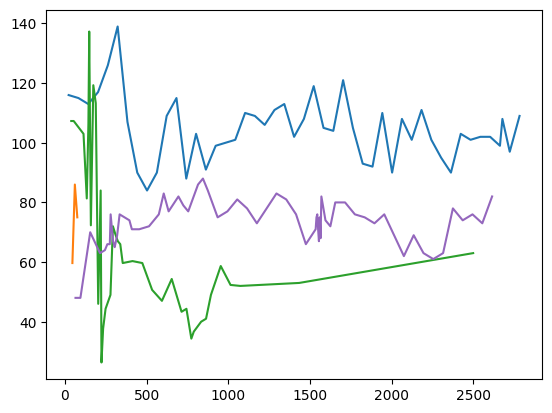

In [ ]:
axis = 8
print(all_fields[axis])

for i, j, k in zip(x, y, y_miss):
    plt.plot(i[np.where(k[:, axis] == 0)], j[:, axis][np.where(k[:, axis] == 0)])

GCS


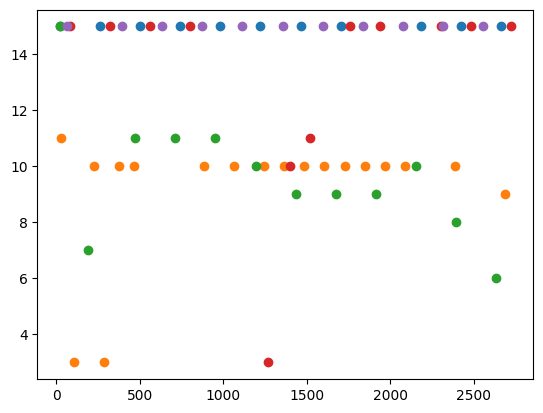

In [ ]:
axis = 19
print(all_fields[axis])

for i, j, k in zip(x, y, y_miss):
    plt.scatter(i[np.where(k[:, axis] == 0)], j[:, axis][np.where(k[:, axis] == 0)])

In [ ]:
full_data = []
full_data_label = []
full_data_miss = []
full_data_ini = []

icus = {'1': [1, 0, 0, 0], '2':[0, 1, 0, 0], '3':[0, 0, 1, 0], '4':[0, 0, 0, 1]}
freq = 60
counter = 0
for k, v in dataset.items():
  counter += 1
  ini = [int(v['Age']), int(v['Gender']), float(v['Height']), *icus[v['ICUType']]]

  times = []
  missing = []

  timeseries = pd.DataFrame(v['timeseries'])
  miss = pd.DataFrame(v['missing'])

  for s in range(0, 48*60 + 1, freq):
    times.append(timeseries.loc[:, (timeseries.columns >= s) & (timeseries.columns < s + freq)].mean(axis=1).fillna(0))
    missing.append(np.all(miss.loc[:, (miss.columns >= s) & (miss.columns < s + freq)], axis=1))

  full_data.append(np.array(times))
  full_data_miss.append(np.array(missing))
  full_data_ini.append(np.array(ini))
  full_data_label.append(labels[k])

  if counter % 100 == 0:
    print(f'Parsed Records: {counter}', end='\r')

print()
full_data = np.array(full_data)
full_data_label = np.array(full_data_label)
full_data_miss = np.array(full_data_miss)
full_data_ini = np.array(full_data_ini).reshape((-1, 1, 7))

print(f'Data Shape: {full_data.shape}')
print(f'Missing Shape: {full_data_miss.shape}')
print(f'Ini Shape: {full_data_ini.shape}')
print(f'Label Shape: {full_data_label.shape}')


Data Shape: (1568, 49, 37)
Missing Shape: (1568, 49, 37)
Ini Shape: (1568, 1, 7)
Label Shape: (1568,)


In [ ]:
full_data_ini[:, 0, 0] = (full_data_ini[:, 0, 0] - full_data_ini[:, 0, 0].mean()) / full_data_ini[:, 0, 0].std()
full_data_ini[:, 0, 2] = (full_data_ini[:, 0, 2] - full_data_ini[:, 0, 2].mean()) / full_data_ini[:, 0, 2].std()

In [ ]:
def normalized(x):
  temp = x - x.mean(axis=1).reshape(x.shape[0], 1, x.shape[2])
  std = x.std(axis=1).reshape(x.shape[0], 1, x.shape[2])
  std[np.where(std == 0)] = 1
  return temp / std

In [ ]:
hidden_states = 64
decay_gate = tf.keras.layers.Dense(units=hidden_states, activation='relu', kernel_initializer='he_normal', name='decay_unit')
concat = tf.keras.layers.Concatenate(axis=-1, name='concat_layer')
update_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='update_gate')
forget_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='forget_gate')
a_gate = tf.keras.layers.Dense(units=hidden_states, activation='sigmoid', kernel_initializer='he_normal', name='a_gate')
c_tilda = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name='c_tilda')
layer_a = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name='layer_a')


def lstm_block_physionet(hidden_states=hidden_states):
    vals = tf.keras.Input(shape=(1, 37))
    miss = tf.keras.Input(shape=(1, 37))

    c0 = tf.keras.Input(shape=(1, hidden_states))
    a0 = tf.keras.Input(shape=(1, hidden_states))

    decay = decay_gate(miss)
    decay = tf.math.negative(decay)
    decay = tf.math.exp(decay)
    c = tf.math.multiply(c0, decay)

    o = concat([miss, a0, vals])
    ug = update_gate(o)
    fg = forget_gate(o)
    ag = a_gate(o)

    c_temp = c_tilda(o)

    update_term = tf.math.multiply(c, ug)
    forget_term = tf.math.multiply(c_temp, fg)

    c_next = tf.keras.layers.add([update_term, forget_term])
    a_next = layer_a(c_next)
    a_next = tf.math.multiply(ag, a_next)

    return tf.keras.Model(inputs=[vals, miss, c0, a0], outputs=[c_next, a_next], name='LSTMCell')

LSTMCell = lstm_block_physionet()
x_reshaper = tf.keras.layers.Reshape((1, 37))
hidden_reshaper = tf.keras.layers.Reshape((1, hidden_states))
delta_reshaper = tf.keras.layers.Reshape((1, 1))

initial_c = tf.keras.layers.Dense(units=hidden_states, activation='tanh', kernel_initializer='he_normal', name="layer_c0")
layer_fc = tf.keras.layers.Dense(units=37, activation='tanh', kernel_initializer='he_normal')
out_layer = tf.keras.layers.Dense(units=2, activation='linear', kernel_initializer='he_normal')
def get_model_physionet(avail_measurements):
    X = tf.keras.Input((avail_measurements, 37))
    XMiss = tf.keras.Input((avail_measurements, 37))
    ini = tf.keras.Input((1, 7))
    A = tf.keras.Input((1, hidden_states))
    c = initial_c(ini)
    a = A
    for i in range(avail_measurements):
        x = X[:, i, :]
        xMiss = XMiss[:, i, :]
        x = x_reshaper(x)
        xMiss = x_reshaper(xMiss)
        c = hidden_reshaper(c)
        a = hidden_reshaper(a)

        c, a = LSTMCell([x, xMiss, c, a])

    a = layer_fc(a)
    out = out_layer(a)

    return tf.keras.Model(inputs=[X, XMiss, ini, A], outputs=out)

In [ ]:
model = get_model_physionet(full_data.shape[1])

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
# Prepare Data For Fitting
def train_model(model=model, epochs=5):
  indices_0 = np.where(full_data_label == 0)[0].ravel()
  indices_1 = np.where(full_data_label == 1)[0].ravel()

  eq_len = min(len(indices_0), len(indices_1))
  norm_data = normalized(full_data)

  i0 = np.random.choice(indices_0, eq_len)
  i1 = np.random.choice(indices_1, eq_len)
  i = np.random.choice(np.array([*i0.tolist(), *i1.tolist()]), 2*eq_len)
  for _ in range(epochs):

    model.fit(x=[norm_data[i, :, :], full_data_miss[i, :, :], full_data_ini[i, :, :], np.zeros((i.shape[0], 1, hidden_states))], y=full_data_label[i], batch_size=32, epochs=1)
train_model()

15/15 [==============================] - 1s 42ms/step - loss: 0.2973


In [ ]:
pred = []
label = []
pred_detail = []

ini = full_data_ini
X = normalized(full_data)
XMiss = full_data_miss
A = np.zeros((X.shape[0], 1, hidden_states))
c = initial_c(ini)
a = A

for i in range(X.shape[1]):
    x = X[:, i, :]
    xMiss = XMiss[:, i, :]
    x = x_reshaper(x)
    xMiss = x_reshaper(xMiss)
    c = hidden_reshaper(c)
    a = hidden_reshaper(a)

    c, a = LSTMCell([x, xMiss, c, a])

a = layer_fc(a)
out = out_layer(a)

pred_detail.extend(tf.nn.softmax(out).numpy().tolist())
pred.extend(tf.math.argmax(tf.nn.softmax(out), axis=-1).numpy().ravel().tolist())
label.extend(full_data_label)

In [ ]:
pred = np.array(pred)
label = np.array(label)
pred_detail = np.array(pred_detail)

In [ ]:
tp = np.count_nonzero((pred == 1) & (label == 1))
fp = np.count_nonzero((pred == 1) & (label == 0))
fn = np.count_nonzero((pred == 0) & (label == 1))
tn = np.count_nonzero((pred == 0) & (label == 0))

se = tp / (tp + fn)
p = tp / (tp + fp)

print(se, p)
print(min(se, p))

prec = np.count_nonzero((pred == 1) & (label == 1)) / np.count_nonzero(pred == 1)
rec = np.count_nonzero((pred == 1) & (label == 1)) / np.count_nonzero(label == 1)
f = 2 * (prec * rec) / (prec + rec)
f

0.7336244541484717 0.45901639344262296
0.45901639344262296


0.5647058823529412

In [ ]:
np.count_nonzero(pred == label) / pred.shape[0] * 100

83.48214285714286